In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

for directory,_,filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(directory,filename))

./data/amazon.csv
./data/Data_Project_6_Brazil_Covered_with_Forest_Fire.pdf


In [2]:
data = pd.read_csv('data/amazon.csv',encoding="iso-8859-1")
data

year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]

### Check data type of each column

a. Find what is the type of ‘date’ column is

b. If it is of ‘object’ type, we need to convert the type into datetime

c. For conversion you need to make changes again in read_csv method, put third parameter
into it for parsing dates (you need to figure out by yourself regarding third parameter)

d. Please check after making chang

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [4]:
data.describe()

year       number
count  6454.000000  6454.000000
mean   2007.461729   108.293163
std       5.746654   190.812242
min    1998.000000     0.000000
25%    2002.000000     3.000000
50%    2007.000000    24.000000
75%    2012.000000   113.000000
max    2017.000000   998.000000

In [5]:
f'date Type: {data.date.dtype}'

'date Type: object'

In [6]:
data = pd.read_csv('data/amazon.csv',encoding="iso-8859-1",parse_dates=['date'])
data.head(1)

year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01

In [7]:
f'date Type: {data.date.dtype}'

'date Type: datetime64[ns]'

In [8]:
data.head()

year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01

In [9]:
data.tail()

year      state     month  number       date
6449  2012  Tocantins  Dezembro   128.0 2012-01-01
6450  2013  Tocantins  Dezembro    85.0 2013-01-01
6451  2014  Tocantins  Dezembro   223.0 2014-01-01
6452  2015  Tocantins  Dezembro   373.0 2015-01-01
6453  2016  Tocantins  Dezembro   119.0 2016-01-01

### Find shape of our dataset (number of rows and number of columns).
a. Kindly print number of rows and columns separately

In [10]:
data.shape

(6454, 5)

In [11]:
def get_num_cols(data):
    return len(data.T)

def get_num_rows(data):
    return len(data)

def get_memory_usage(data):
    return data.memory_usage(deep=1).sum()

In [12]:
get_memory_usage(data)

1001646

### Getting information about our dataset like total number rows, total number of columns,
datatypes of each column and memory requirement.

In [13]:
get_num_cols(data)

5

In [14]:
get_num_rows(data)

6454

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### Check for duplicate data and drop them.
a. You can use duplicated () method

b. Please mention how many duplicate values are removed

In [16]:
num_of_dup=len(data) - len(data.drop_duplicates())
f'num of duplicates: {num_of_dup}'

'num of duplicates: 32'

In [17]:
data = data.drop_duplicates()

### Check null values in the dataset.
a. Please add a comment if you find any null value

In [18]:
num_of_null=len(data) - len(data.isna())
num_of_null

0

### Get overall statistics about the data frame.
a. Here you will find that you are getting only numerical columns

b. Kindly show categorical columns as well, if you find any warning then kindly add extra
parameter in method.

In [19]:
data.describe()

year       number
count  6422.000000  6422.000000
mean   2007.490969   108.815178
std       5.731806   191.142482
min    1998.000000     0.000000
25%    2003.000000     3.000000
50%    2007.000000    24.497000
75%    2012.000000   114.000000
max    2017.000000   998.000000

In [20]:
data.head()

year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01

In [21]:
data_cat = [x for x in data.columns if data[x].dtype == 'O']
data_cat = data[data_cat]

In [22]:
for col in data_cat.columns:
    print('*'*50,col,'*'*50)
    print(f'num of unique {col} : {data[col].nunique()}')
    print(f'unique values: {data[col].unique()}')

************************************************** state **************************************************
num of unique state : 23
unique values: ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Parï¿½'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
************************************************** month **************************************************
num of unique month : 12
unique values: ['Janeiro' 'Fevereiro' 'Marï¿½o' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']


### Rename month names to english.
a. You will some columns in different language, you need to change them into english

In [23]:
def create_month_dict(data):
    month_old = list(data[col].unique())
    month_new = "January February March April May June July August September October November December ".split()
    return dict(zip(month_old,month_new))

In [24]:
# month_old = list(data[col].unique())
# month_old

In [25]:
# month_new = "January February March April May June July August September October November December ".split()
# month_new

In [26]:
months = create_month_dict(data)
months

{'Janeiro': 'January',
 'Fevereiro': 'February',
 'Marï¿½o': 'March',
 'Abril': 'April',
 'Maio': 'May',
 'Junho': 'June',
 'Julho': 'July',
 'Agosto': 'August',
 'Setembro': 'September',
 'Outubro': 'October',
 'Novembro': 'November',
 'Dezembro': 'December'}

In [27]:
def changeMonth(month):
    if month in months:
        return months[month]
    return month

In [28]:
data['month'] = data['month'].apply(changeMonth)


In [29]:
data

year      state     month  number       date
0     1998       Acre   January     0.0 1998-01-01
1     1999       Acre   January     0.0 1999-01-01
2     2000       Acre   January     0.0 2000-01-01
3     2001       Acre   January     0.0 2001-01-01
4     2002       Acre   January     0.0 2002-01-01
...    ...        ...       ...     ...        ...
6449  2012  Tocantins  December   128.0 2012-01-01
6450  2013  Tocantins  December    85.0 2013-01-01
6451  2014  Tocantins  December   223.0 2014-01-01
6452  2015  Tocantins  December   373.0 2015-01-01
6453  2016  Tocantins  December   119.0 2016-01-01

[6422 rows x 5 columns]

### Total number of fires registered.

In [30]:
f"total number of fires registered: {data['number'].sum()}"

'total number of fires registered: 698811.073'

### 13. In which month maximum number of forest fires were reported?
a. You need to create proper stats and showing them with the help of bar plot

b. Mention in your comment what did you observe

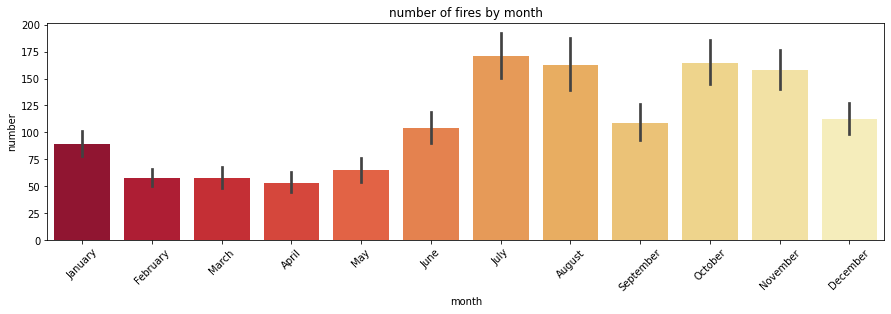

In [31]:
plt.figure(figsize=(15,4))
sns.barplot(data=data,x='month',y='number',palette='YlOrRd_r')
plt.title('number of fires by month')
plt.xticks(rotation=45)
plt.show()

### In which year maximum number of forest fires was reported?
a. Please visualize your output with barplot

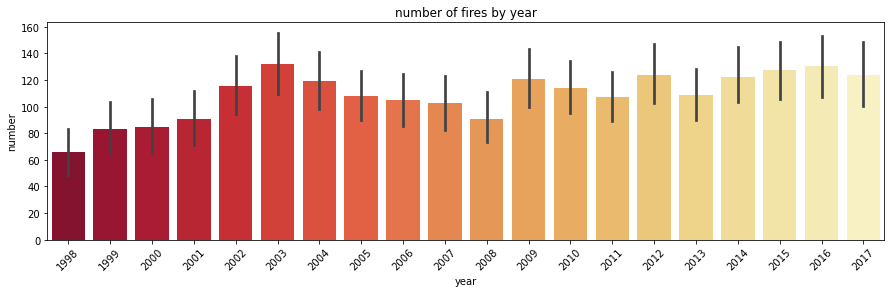

In [32]:
plt.figure(figsize=(15,4))
sns.barplot(data=data,x='year',y='number',palette='YlOrRd_r')
plt.title('number of fires by year')
plt.xticks(rotation=45)
plt.show()

### In which state maximum number of forest fires was reported?
a. Visualization should be there

b. If find that barplot is overlapping, then please fix it using rotation



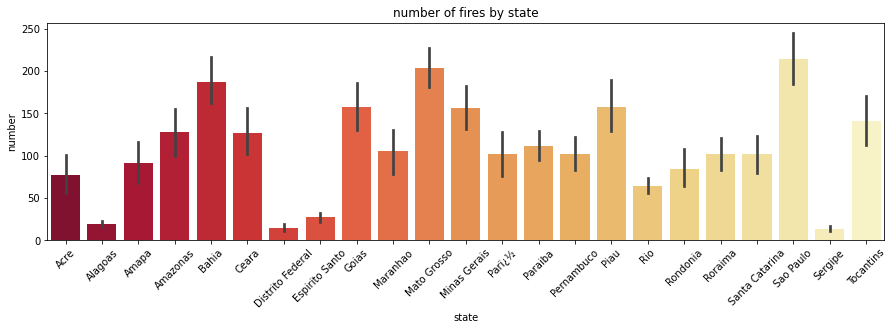

In [33]:
plt.figure(figsize=(15,4))
sns.barplot(data=data,x='state',y='number',palette='YlOrRd_r')
plt.title('number of fires by state')
plt.xticks(rotation=45)
plt.show()

In [34]:
data.groupby('state')['number'].mean()

state
Acre                 77.255356
Alagoas              19.271967
Amapa                91.345506
Amazonas            128.243218
Bahia               187.222703
Ceara               127.314071
Distrito Federal     14.899582
Espirito Santo       27.389121
Goias               157.721841
Maranhao            105.142808
Mato Grosso         203.479975
Minas Gerais        156.800243
Paraiba             111.073979
Parï¿½              102.561272
Pernambuco          102.502092
Piau                158.174674
Rio                  64.698515
Rondonia             84.876272
Roraima             102.029598
Santa Catarina      101.924067
Sao Paulo           213.896226
Sergipe              13.543933
Tocantins           141.037176
Name: number, dtype: float64

### 16. Find total number of fires were reported in amazonas (state of brazil)
a. Add in comment the number of reports


In [35]:
amazon_data = data[data['state'] == 'Amazonas']

In [36]:
f"total number of fires in amazon: {amazon_data['number'].sum()}"


'total number of fires in amazon: 30650.129'

### 17. Display number of fires were reported in amazon (year-wise)
a. Kindly visualize it using barplot after having groupby

b. Please take care of plot overlapping (it should be neat and clean)


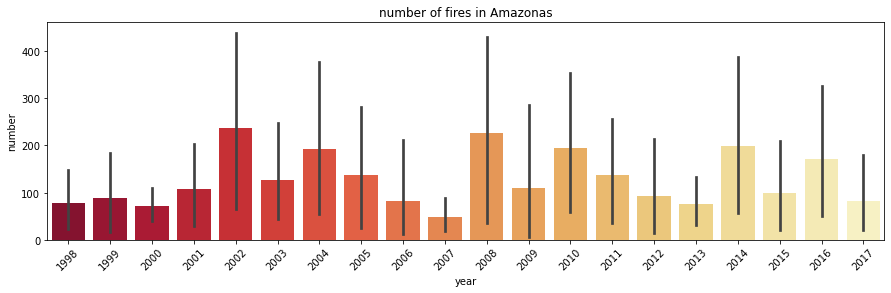

In [37]:
plt.figure(figsize=(15,4))
sns.barplot(data=amazon_data,x='year',y='number',palette='YlOrRd_r')
plt.title('number of fires in Amazonas')
plt.xticks(rotation=45)
plt.show()

### 18. Display number of fires were reported in amazon (day-wise)
a. You need to visualize the result using weekdays name
b. Don’t forget to mention your observation in comment

In [38]:
amazon_data['day_of_week'] = amazon_data['date'].dt.dayofweek
data['day_of_week'] = data['date'].dt.dayofweek

/var/folders/dk/37sbt0k53451bd1_l_nzws1h0000gn/T/ipykernel_58127/2840797945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data['day_of_week'] = amazon_data['date'].dt.dayofweek


In [39]:
amazon_data.head(1)

year     state    month  number       date  day_of_week
718  1998  Amazonas  January     0.0 1998-01-01            3

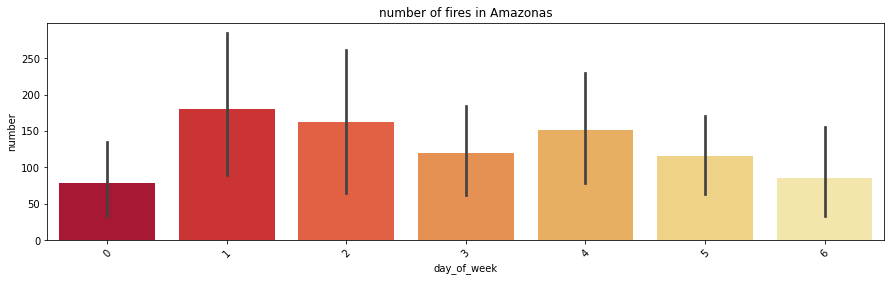

In [40]:
plt.figure(figsize=(15,4))
sns.barplot(data=amazon_data,x='day_of_week',y='number',palette='YlOrRd_r')
plt.title('number of fires in Amazonas')
plt.xticks(rotation=45)
plt.show()

### 19. Find total number of fires were reported in 2015 and visualize data based on each ‘month’.
a. Showing output with beautiful barplot

b. Mention your observation in comment


In [41]:
data_2015 = data[data['year'] == 2015]
data_2015.head(1)

year state    month  number       date  day_of_week
17  2015  Acre  January     1.0 2015-01-01            3

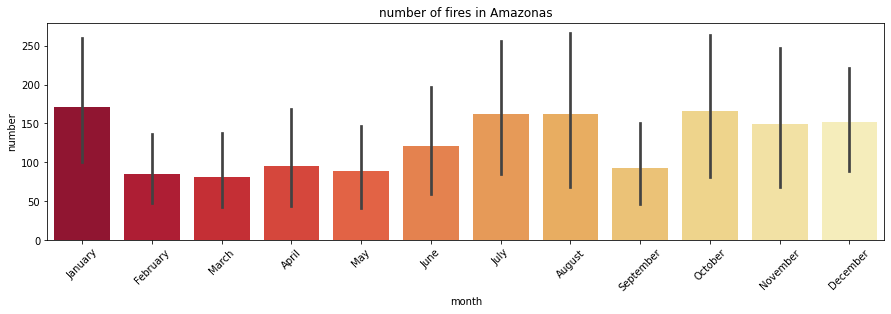

In [42]:
plt.figure(figsize=(15,4))
sns.barplot(data=data_2015,x='month',y='number',palette='YlOrRd_r')
plt.title('number of fires in Amazonas')
plt.xticks(rotation=45)
plt.show()

### 20. Find average number of fires were reported from highest to lowest (state-wise).
a. Visualization should be there with proper observation


<AxesSubplot:xlabel='state'>

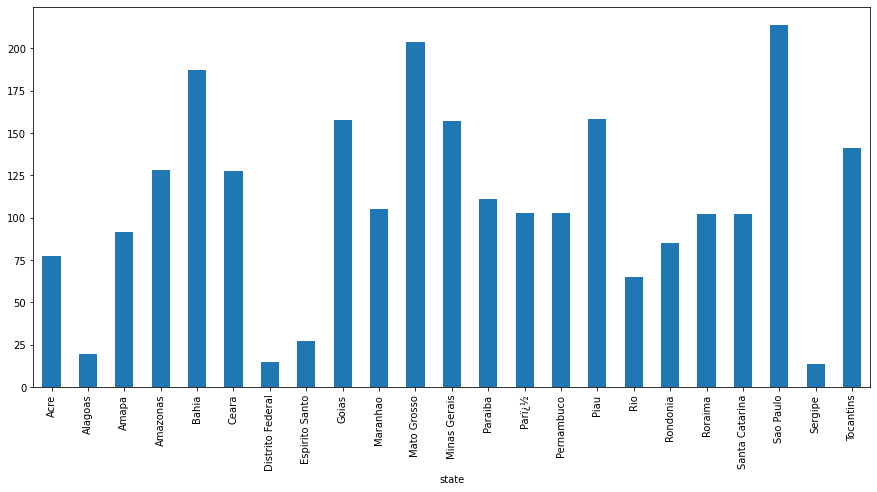

In [43]:
data.groupby('state')['number'].mean().plot.bar(figsize=(15,7))

## 21. To find the state names where fires were reported in 'dec' month.
Bonus: no limit for adding extra analysis.

In [44]:
dec_data = data[data['month'] == 'December']
dec_data = dec_data[dec_data['number'] > 0]
list(dec_data['state'].unique())

['Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Minas Gerais',
 'Parï¿½',
 'Paraiba',
 'Pernambuco',
 'Piau',
 'Rio',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins']

# More

In [45]:
data

year      state     month  number       date  day_of_week
0     1998       Acre   January     0.0 1998-01-01            3
1     1999       Acre   January     0.0 1999-01-01            4
2     2000       Acre   January     0.0 2000-01-01            5
3     2001       Acre   January     0.0 2001-01-01            0
4     2002       Acre   January     0.0 2002-01-01            1
...    ...        ...       ...     ...        ...          ...
6449  2012  Tocantins  December   128.0 2012-01-01            6
6450  2013  Tocantins  December    85.0 2013-01-01            1
6451  2014  Tocantins  December   223.0 2014-01-01            2
6452  2015  Tocantins  December   373.0 2015-01-01            3
6453  2016  Tocantins  December   119.0 2016-01-01            4

[6422 rows x 6 columns]

In [46]:
data.corr()

year    number  day_of_week
year         1.000000  0.062600     0.195564
number       0.062600  1.000000     0.010932
day_of_week  0.195564  0.010932     1.000000

In [47]:
data['state']

0            Acre
1            Acre
2            Acre
3            Acre
4            Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 6422, dtype: object

### First step i wanted to do was anaylse the relationship between the state and number pof wildfires

In [48]:
data['state'].nunique()

23

In [49]:
data['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Parï¿½', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [50]:
states = data['state'].unique()
print(type(states))
states = list(states)
print(type(states))

<class 'numpy.ndarray'>
<class 'list'>


In [51]:
data.head(1)

year state    month  number       date  day_of_week
0  1998  Acre  January     0.0 1998-01-01            3

In [52]:
sns.set_style("darkgrid")

<AxesSubplot:ylabel='state'>

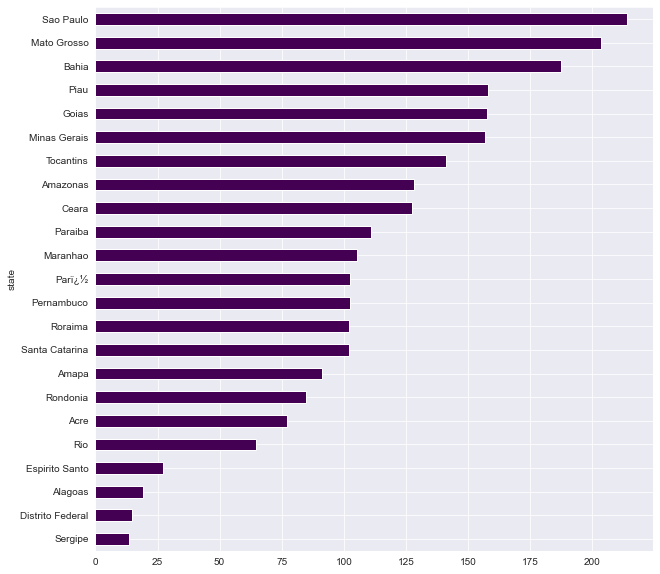

In [138]:
data.groupby('state')['number'].mean().sort_values().plot(kind='barh',figsize=(10,10),cmap='viridis')

<AxesSubplot:xlabel='year', ylabel='number'>

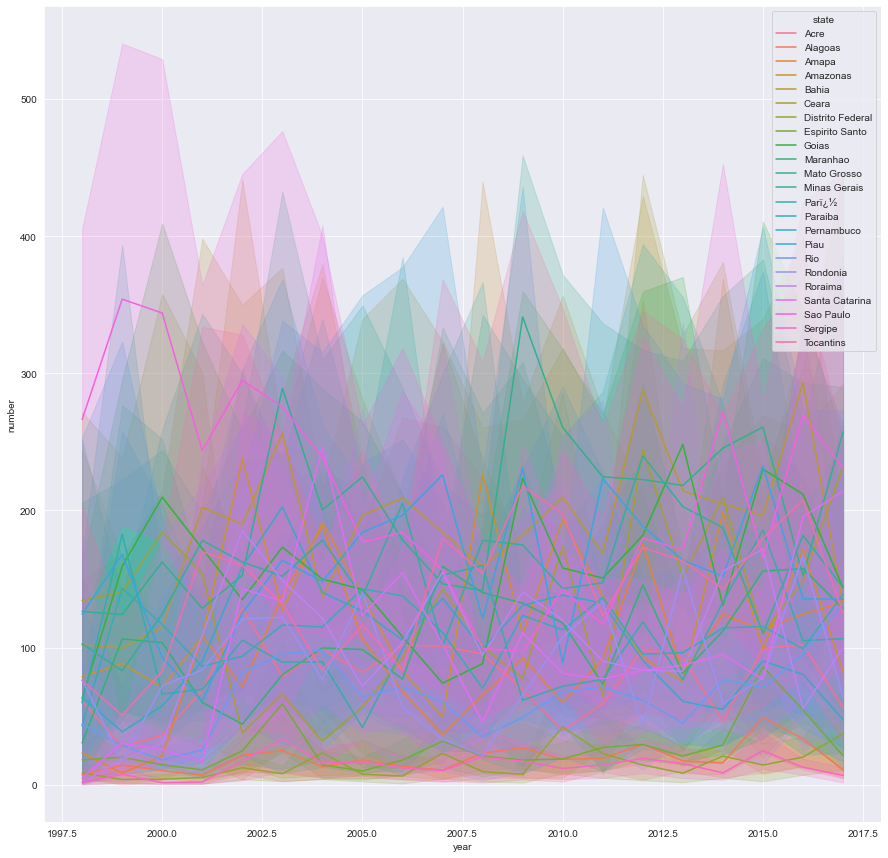

In [54]:
plt.figure(figsize=(15,15))
sns.lineplot(data=data,x='year',y='number',hue='state')

In [131]:
import random 

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', \
            'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', \
            'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', \
            'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', \
            'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', \
            'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', \
            'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',\
            'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', \
            'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',\
            'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', \
            'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', \
            'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', \
            'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r',\
            'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', \
            'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', \
            'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', \
            'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',\
            'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r',\
            'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', \
            'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', \
            'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', \
            'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter',\
            'winter_r']

def random_palette():
    return random.choice(palettes)


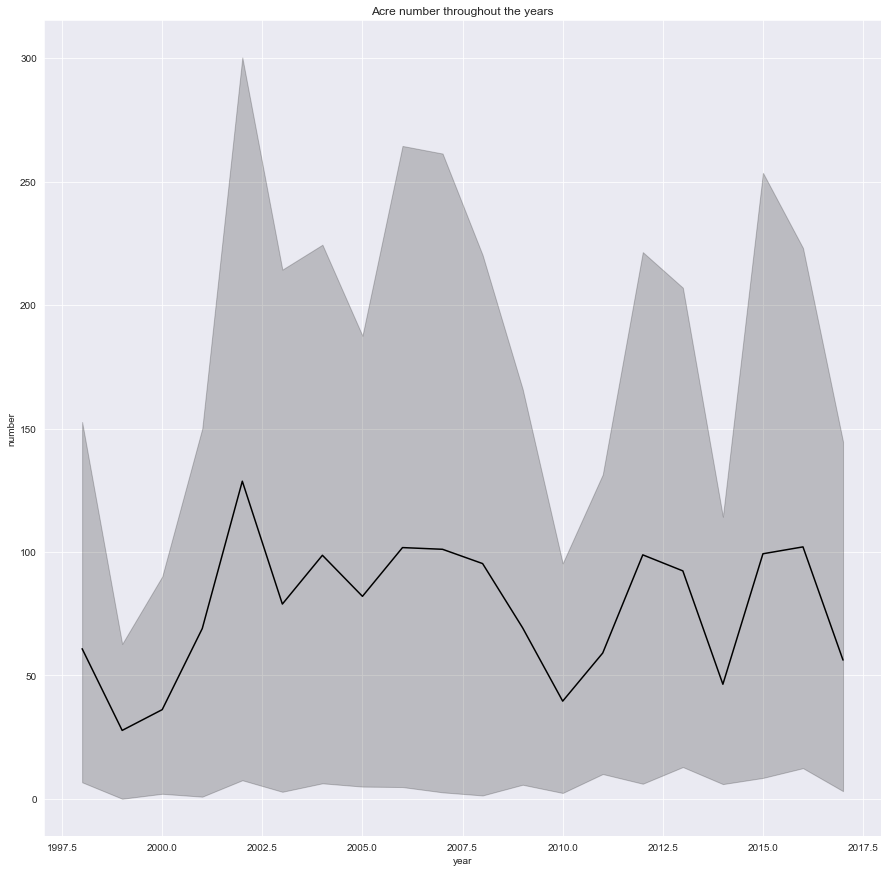

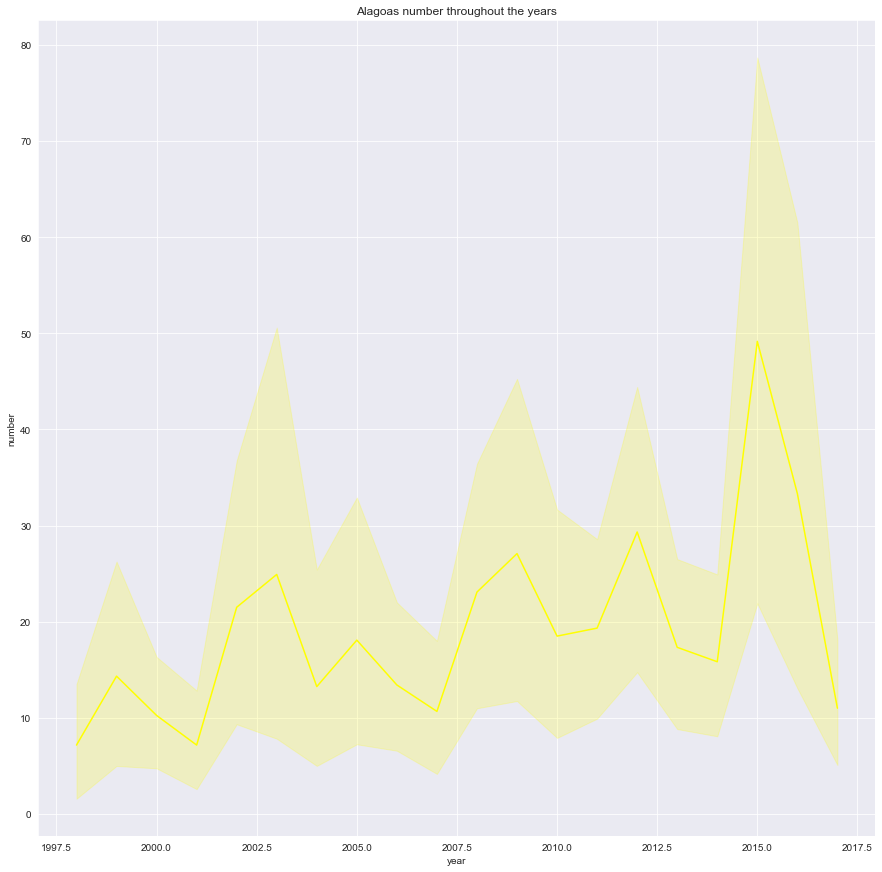

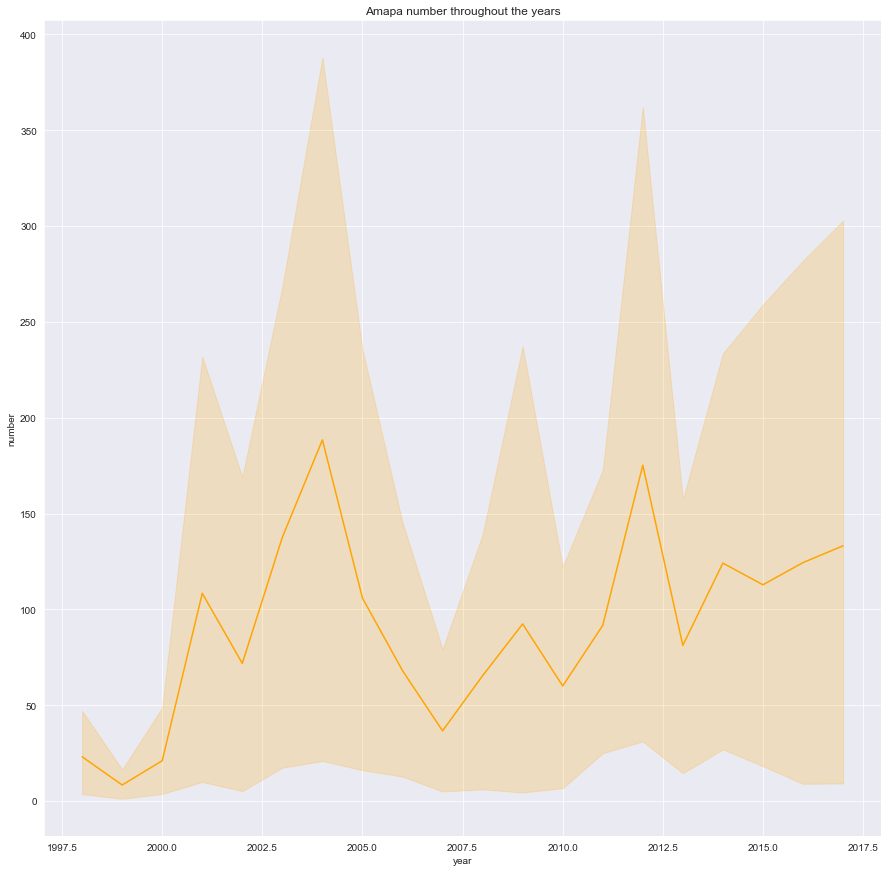

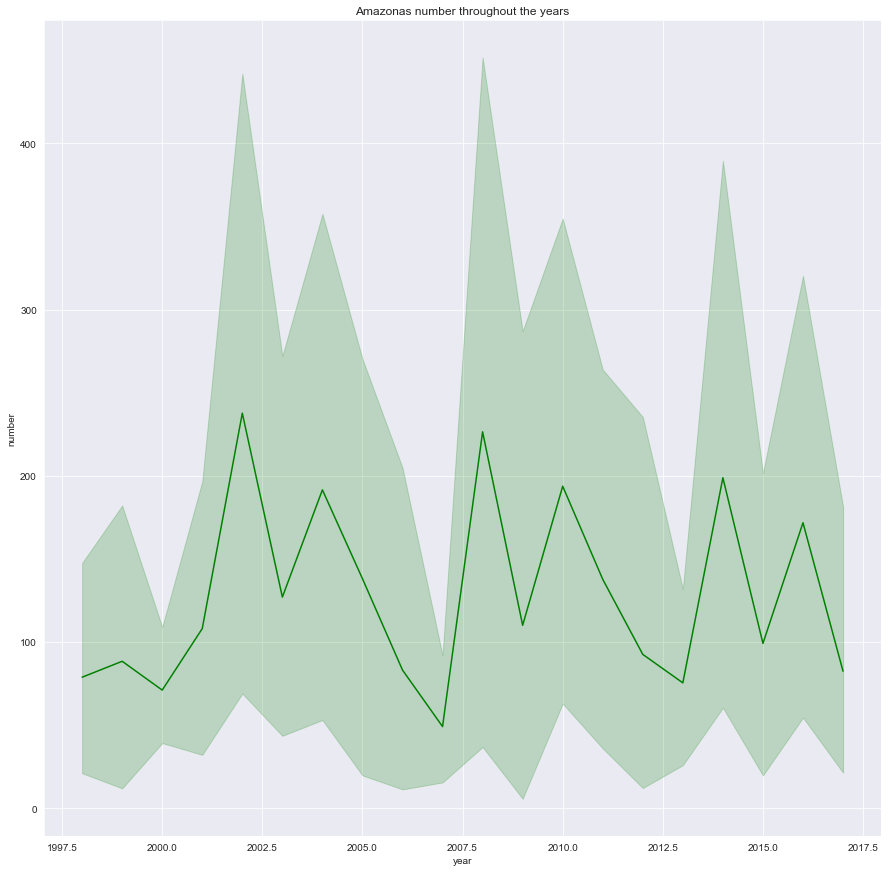

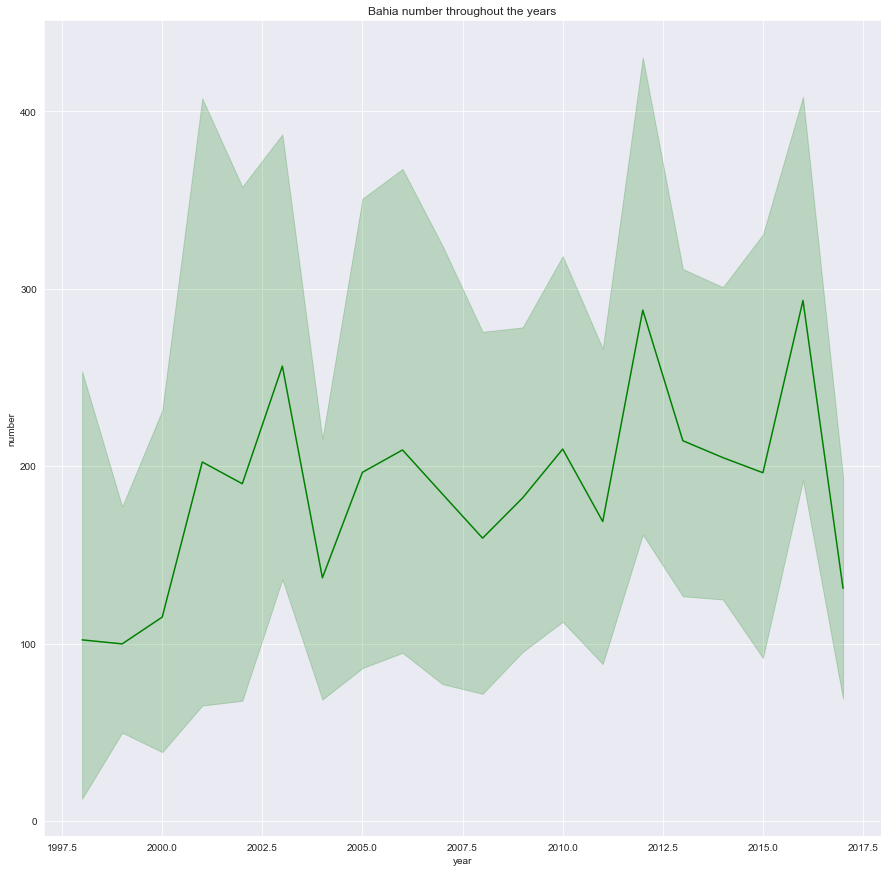

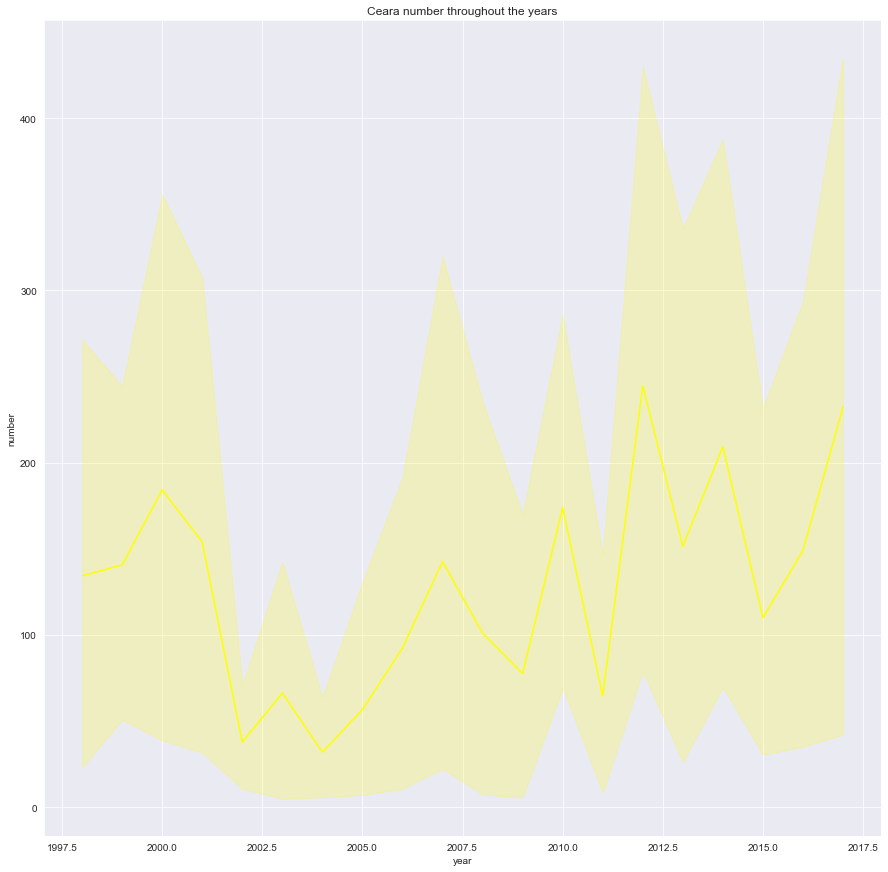

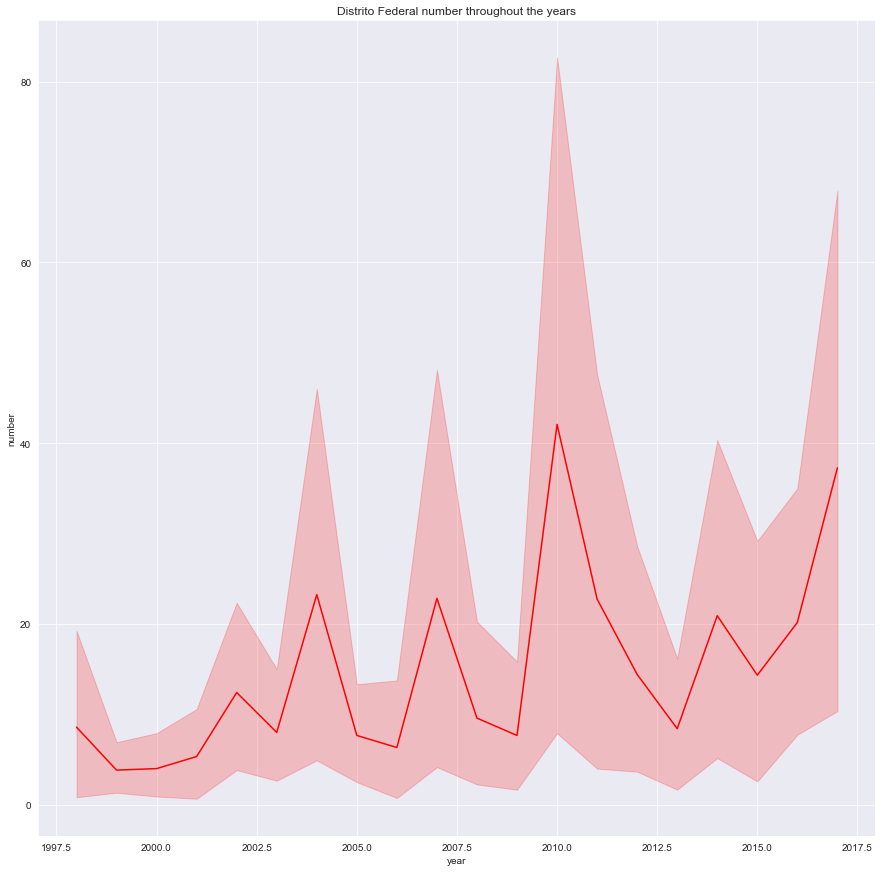

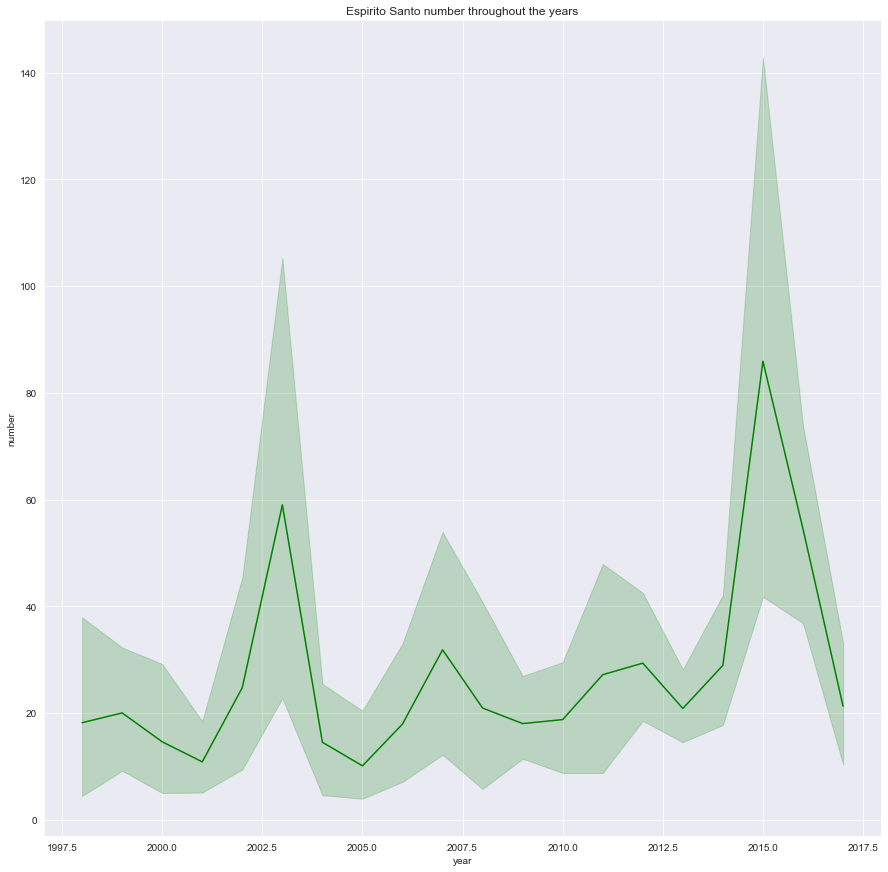

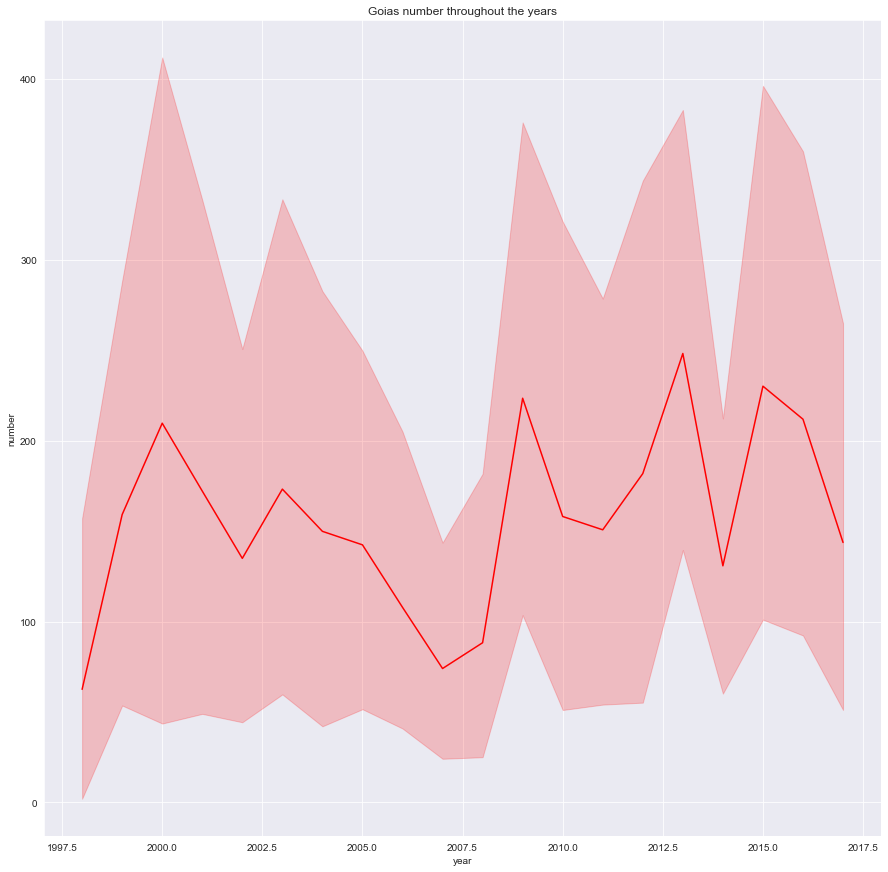

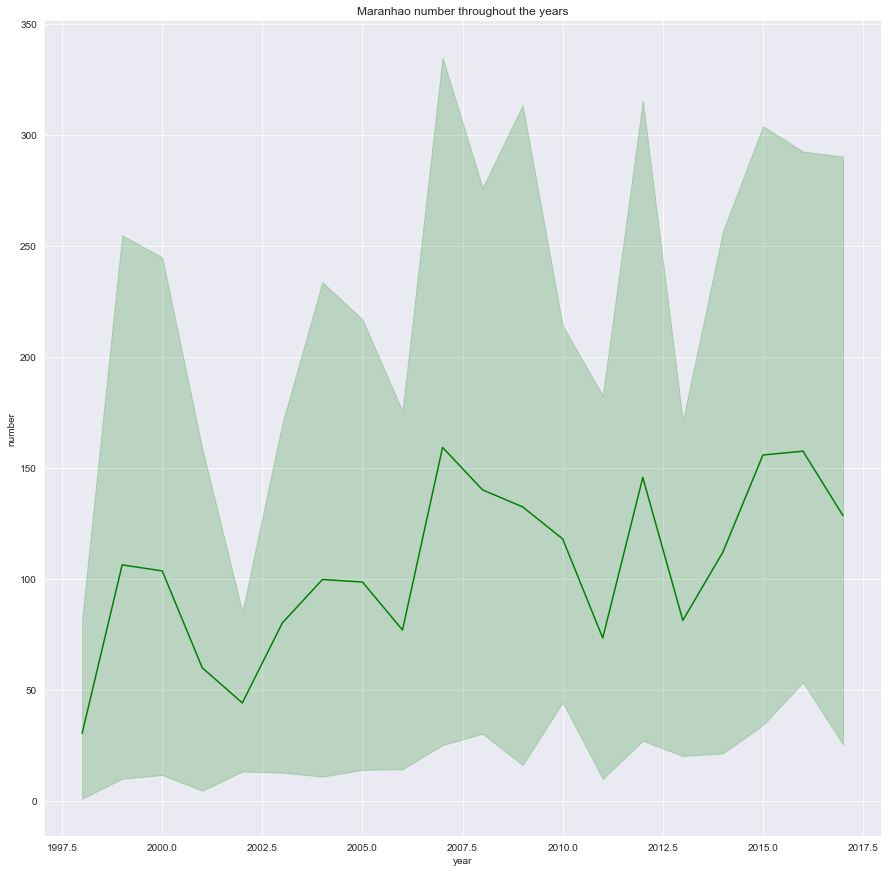

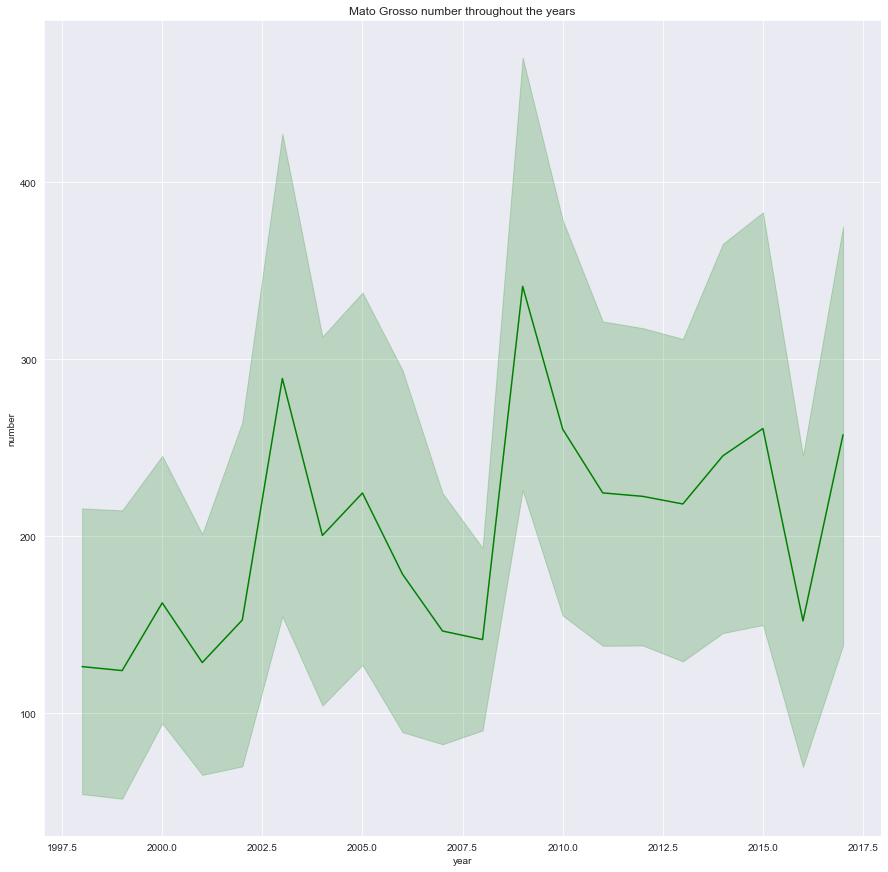

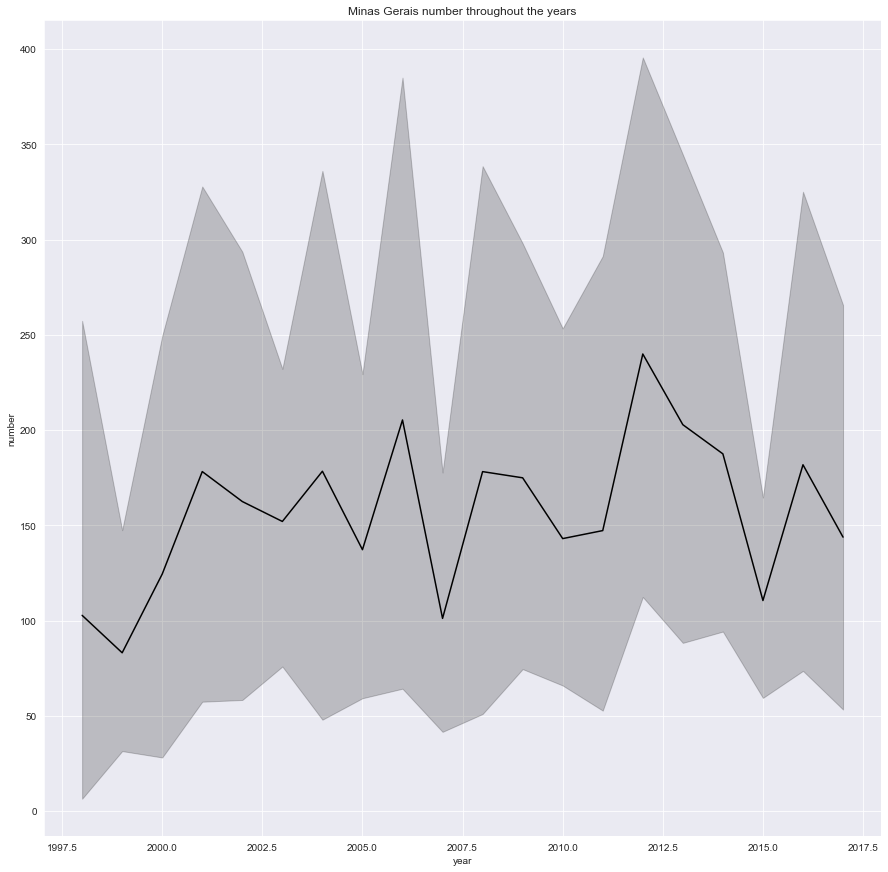

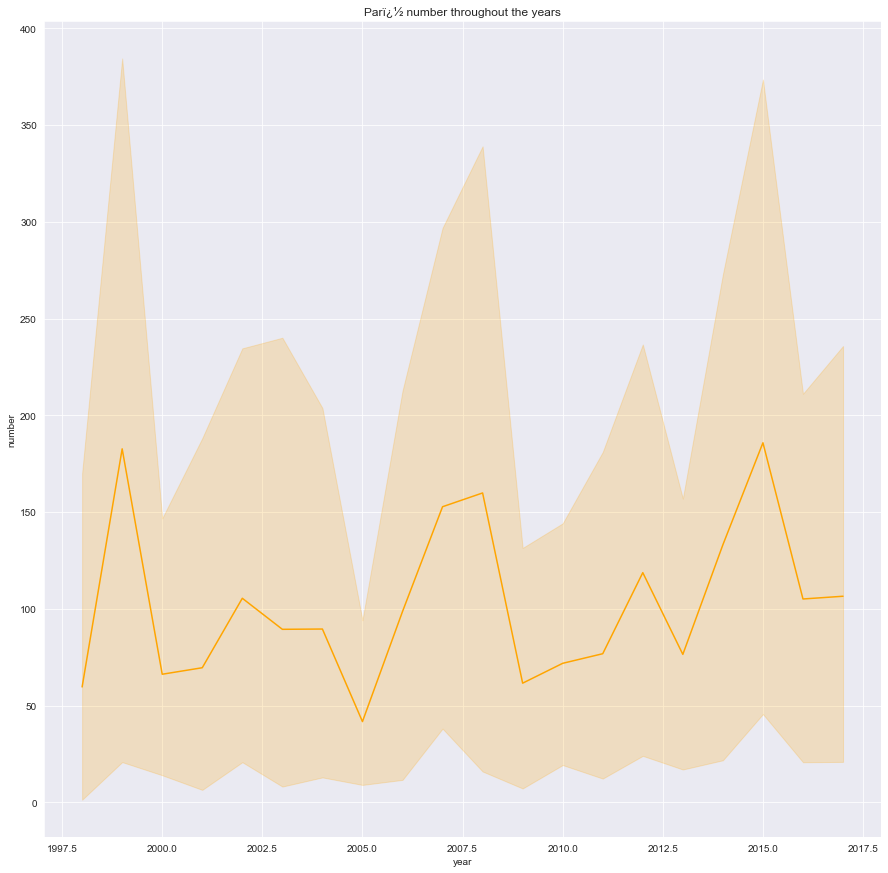

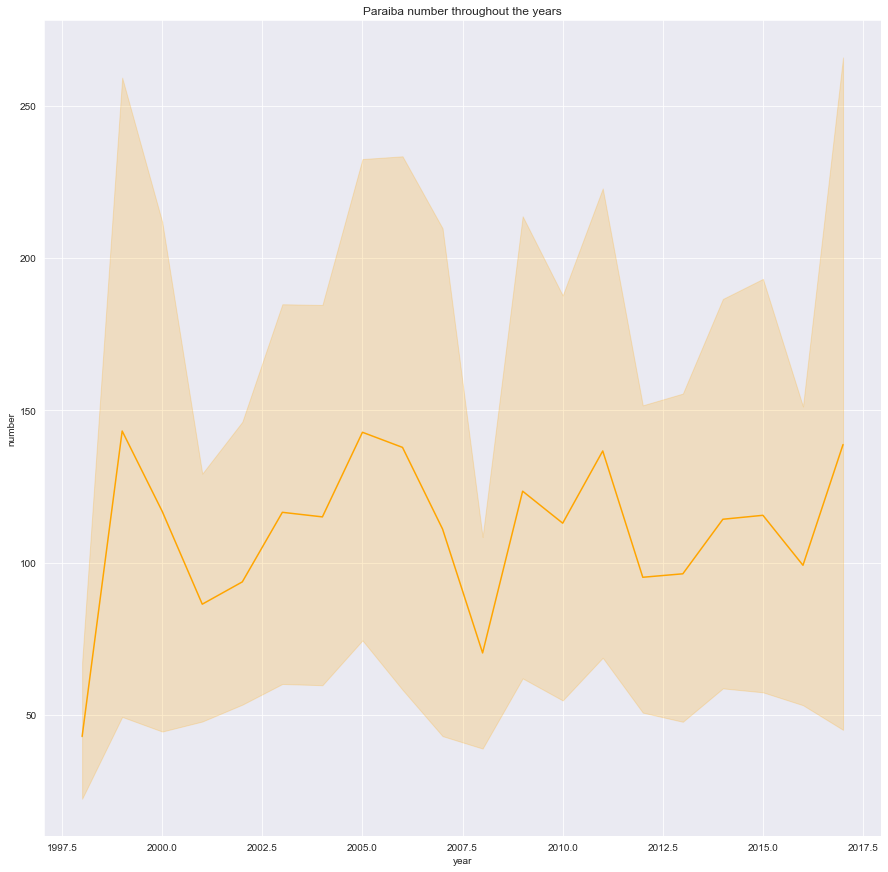

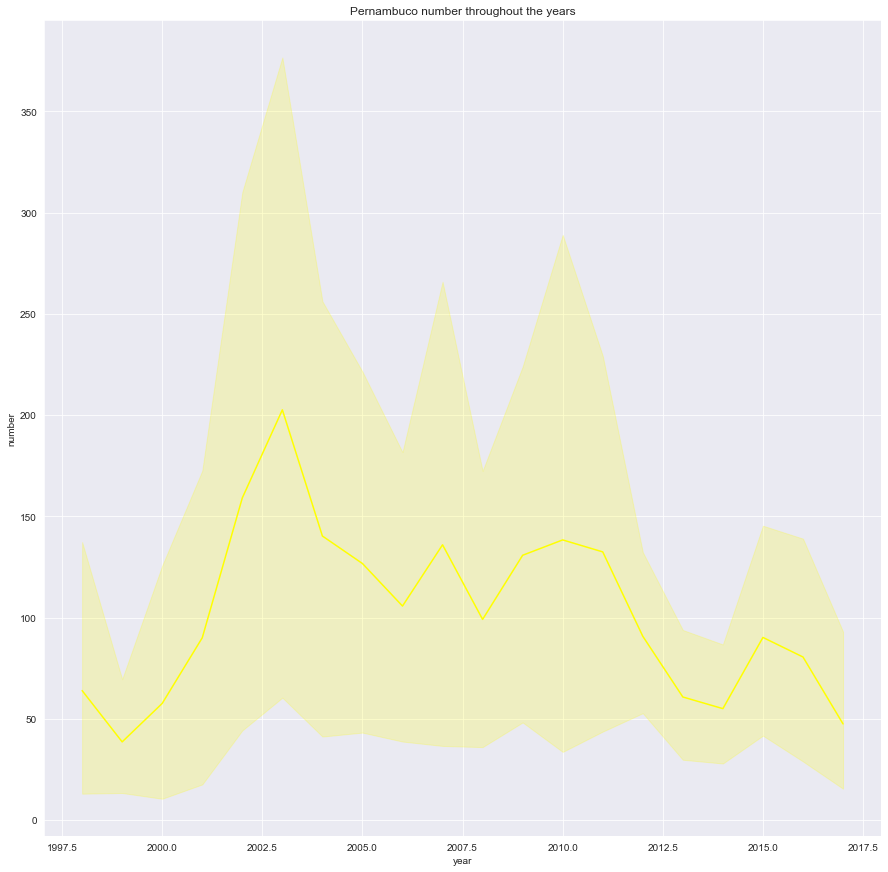

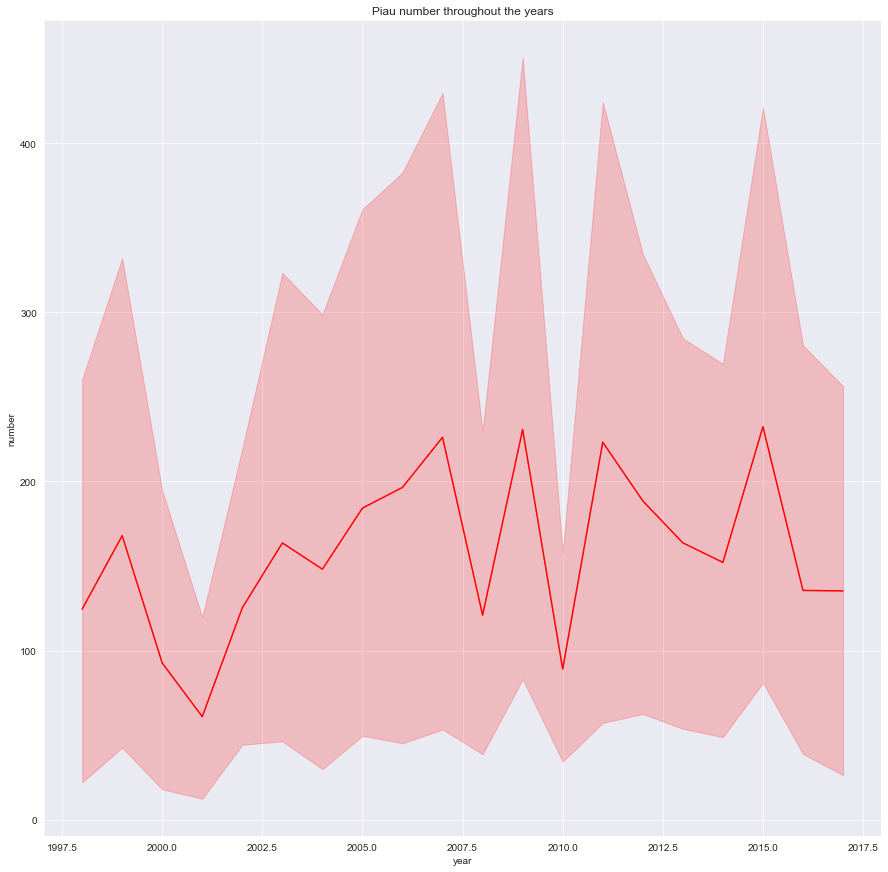

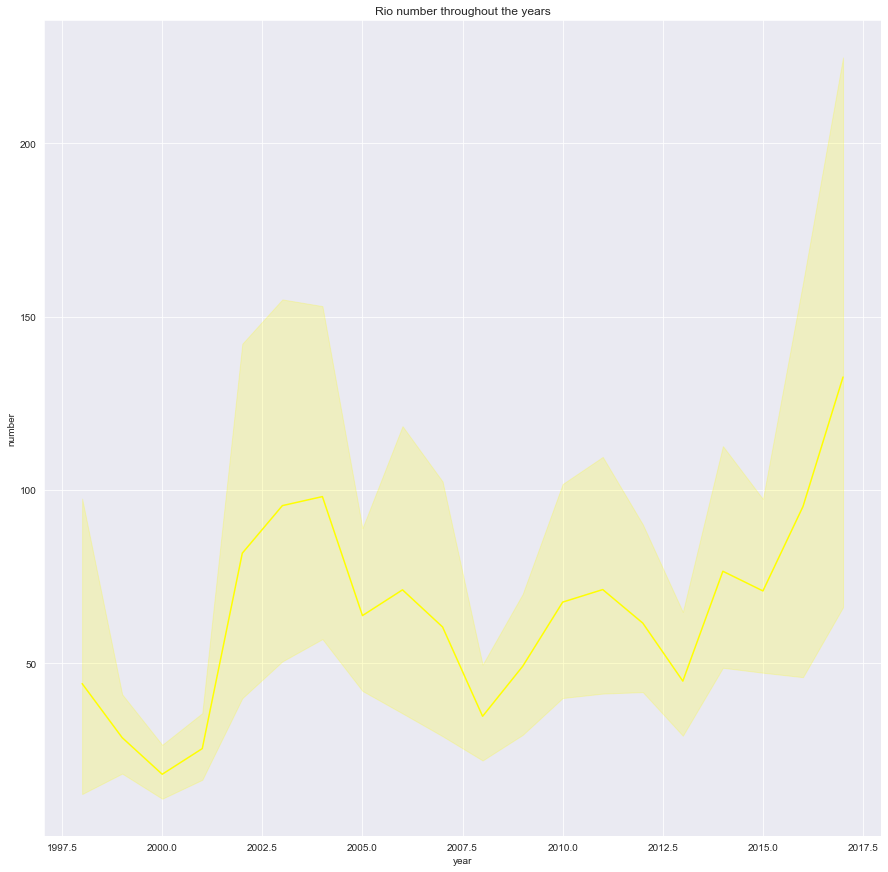

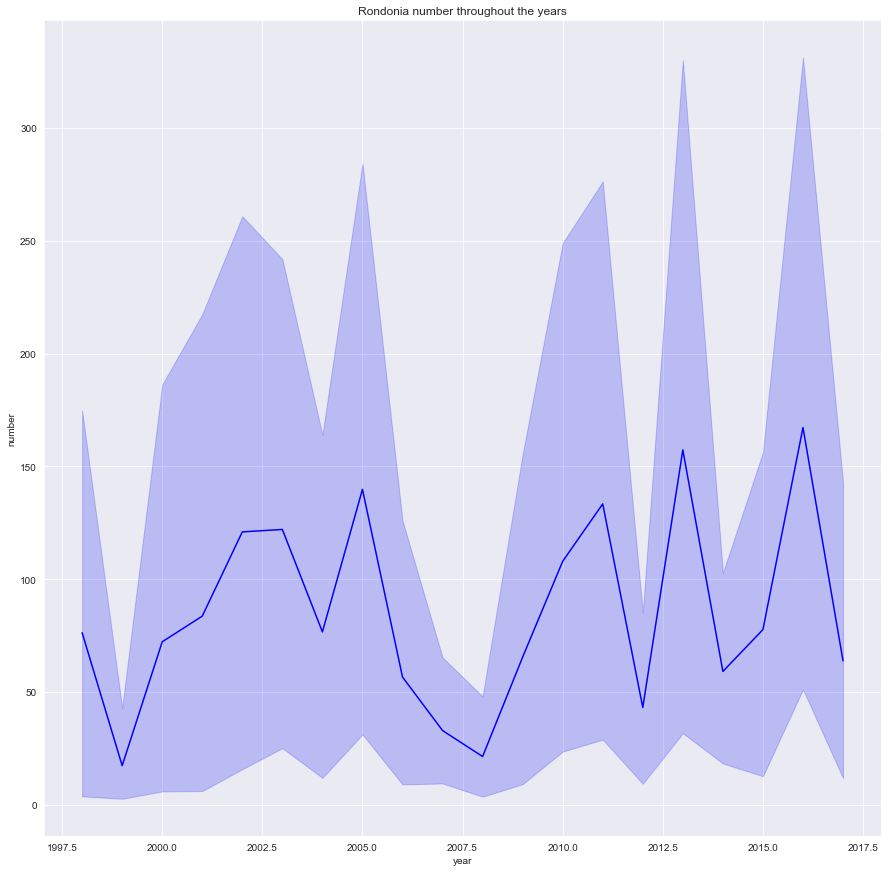

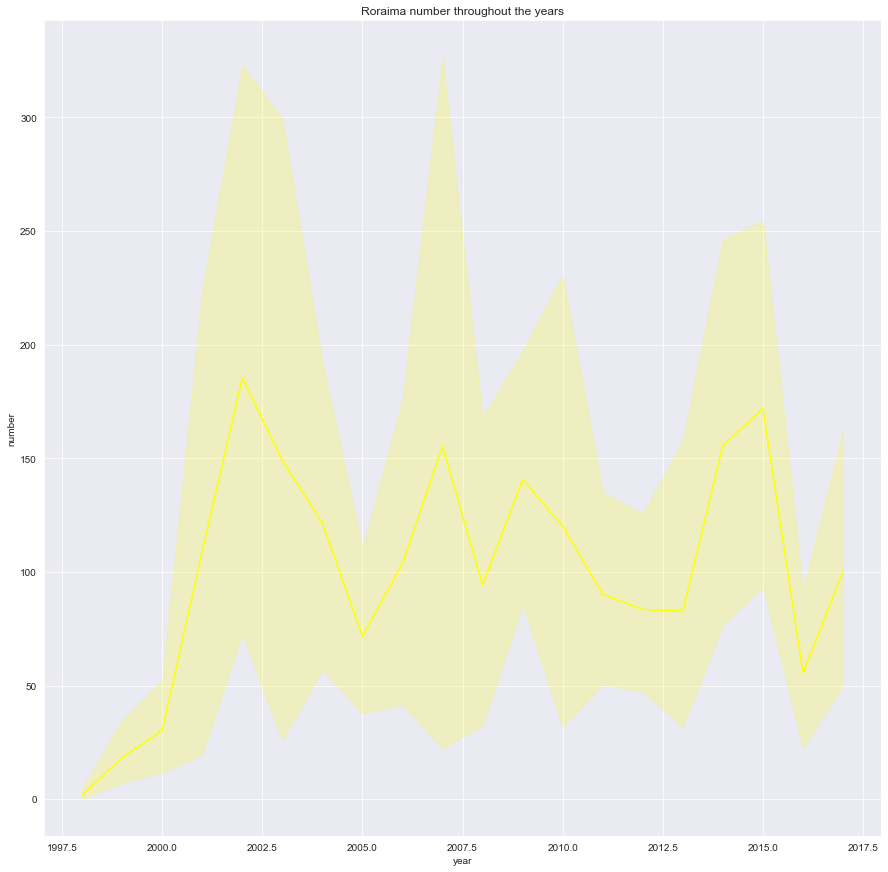

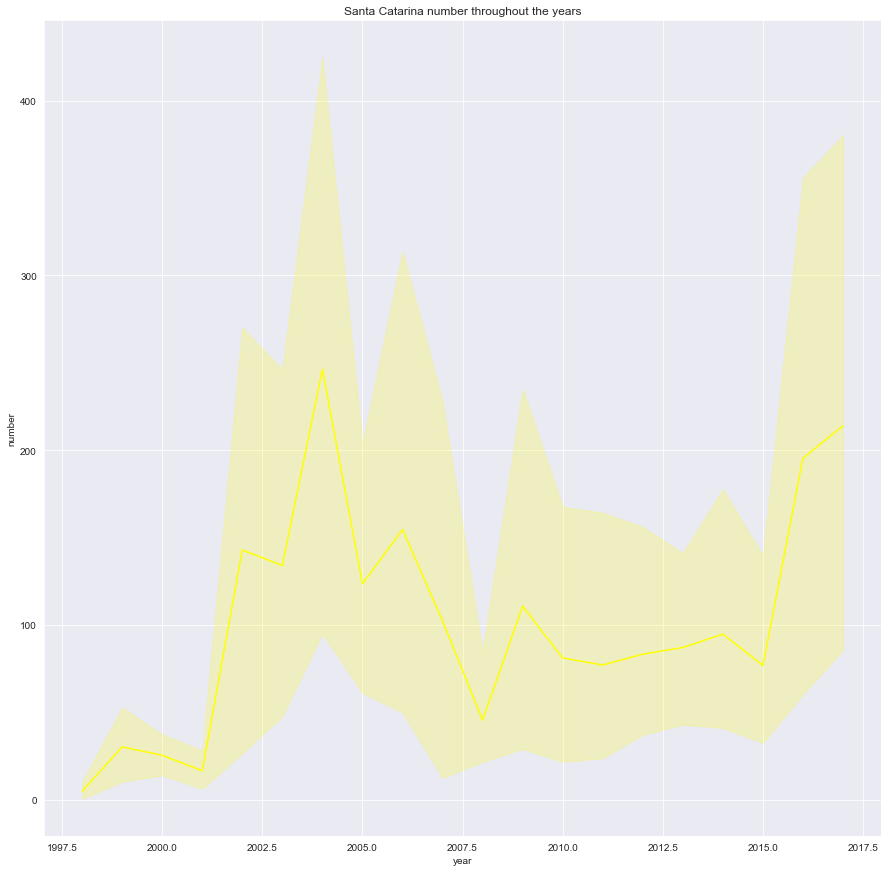

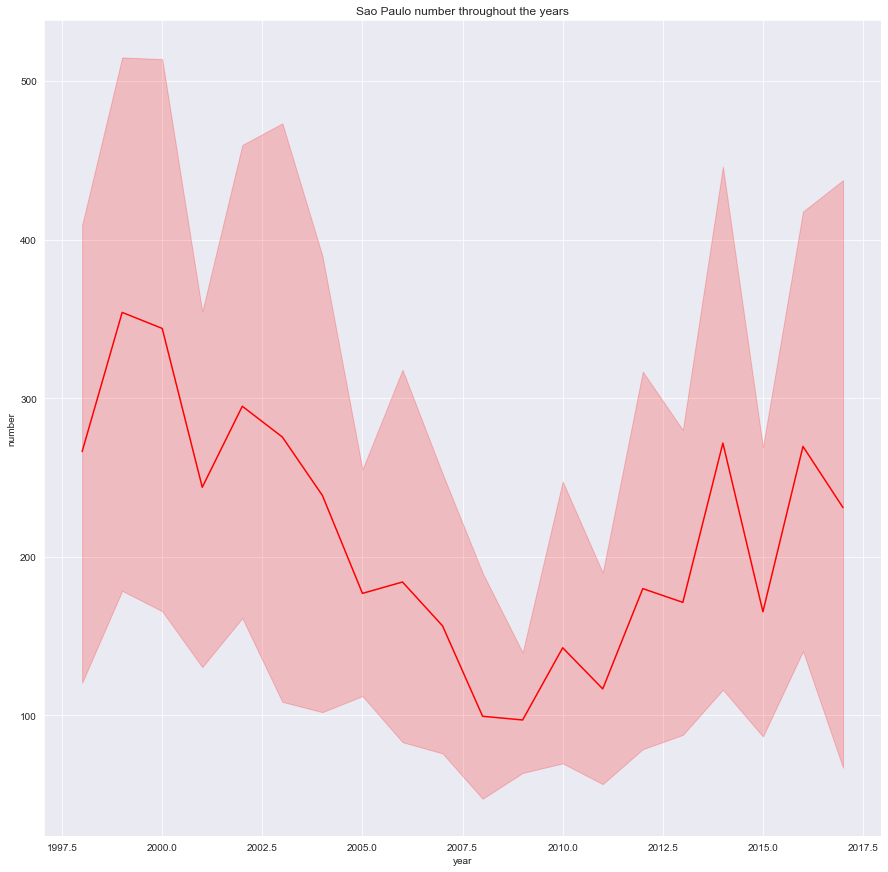

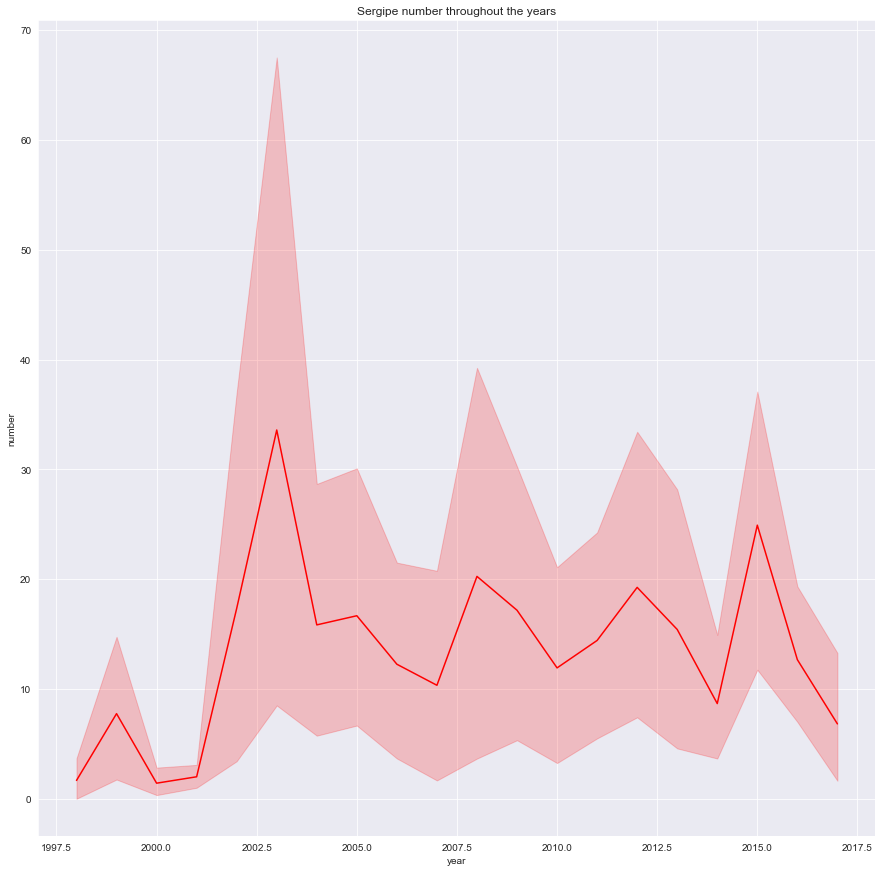

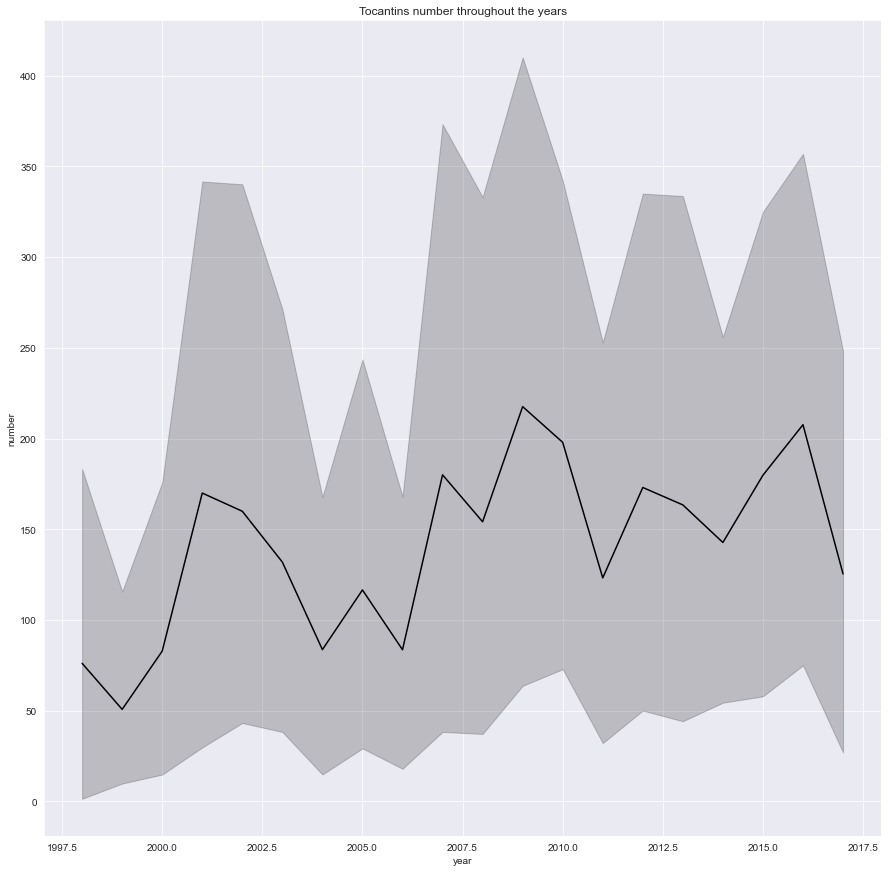

In [56]:
import random
colors = 'red blue green yellow black orange'.split()
for state in states:
    color = random.choice(colors)
    temp = data[data['state'] == state]
    plt.figure(figsize=(15,15))
    plt.title(f'{state} number throughout the years')
    sns.lineplot(data=temp,x='year',y='number',color=color)
    plt.show()
    

### The shadow is the "Confidence Interval" Meaning its the range of 'y' given the 'x'

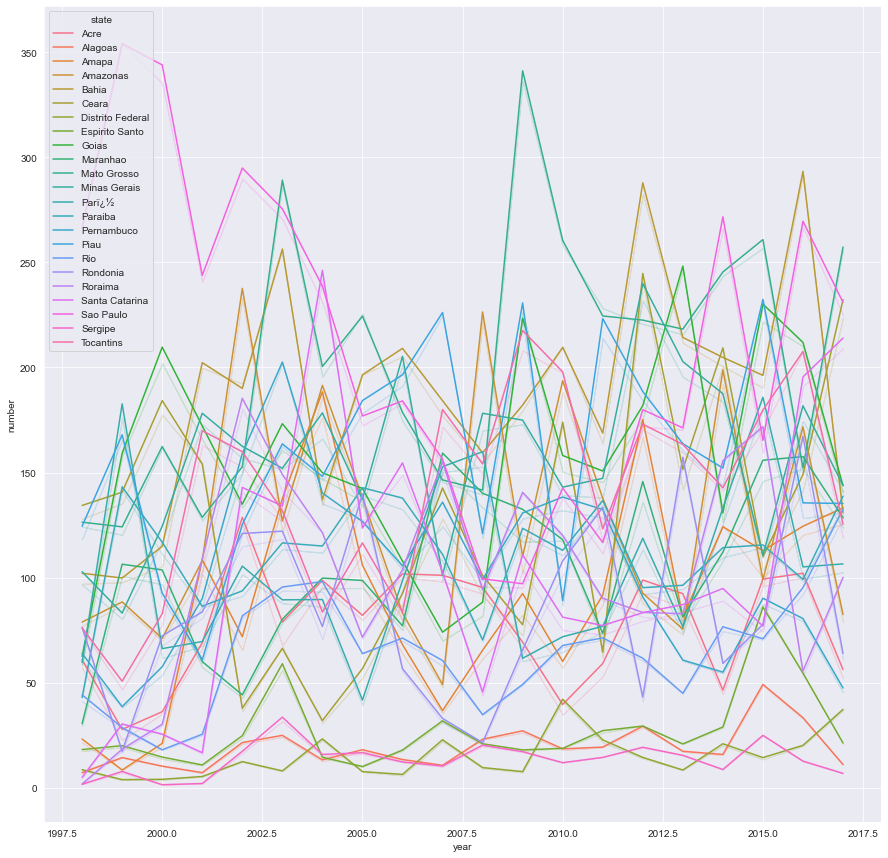

In [57]:
plt.figure(figsize=(15,15))
sns.lineplot(data=data,x='year',y='number',hue='state',ci=False)
plt.show()

In [58]:
len(states)

23

### i want to get the states with the most change in the 20 years 

In [59]:
early_year = data['year'].min()
recent_year = data.year.max()
early_year,recent_year

(1998, 2017)

In [60]:
data_years = data[(data['year'] == early_year) | (data['year'] == recent_year)]
data_years

year      state     month   number       date  day_of_week
0     1998       Acre   January    0.000 1998-01-01            3
19    2017       Acre   January    0.000 2017-01-01            6
20    1998       Acre  February    0.000 1998-01-01            3
39    2017       Acre  February    1.000 2017-01-01            6
40    1998       Acre     March    0.000 1998-01-01            3
...    ...        ...       ...      ...        ...          ...
6395  1998  Tocantins   October    1.738 1998-01-01            3
6414  2017  Tocantins   October    2.969 2017-01-01            6
6415  1998  Tocantins  November    1.000 1998-01-01            3
6434  2017  Tocantins  November  434.000 2017-01-01            6
6435  1998  Tocantins  December    9.000 1998-01-01            3

[600 rows x 6 columns]

In [61]:
states

['Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Minas Gerais',
 'Parï¿½',
 'Paraiba',
 'Pernambuco',
 'Piau',
 'Rio',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins']

In [183]:
diffs = {}
for state in states:
    temp = data_years[data_years['state'] == state]
    miny = temp[temp['year'] == early_year]
    miny = miny['number'].mean()
    maxy = temp[temp['year'] == recent_year]
    maxy = maxy['number'].mean()
    diffs[state] = {'diff': abs(maxy - miny),'1997': miny,'2017':maxy}
    
del temp
    


In [185]:
# diffs = sorted(diffs.items(), key=lambda items: items[1]['diff'],reverse=True)
# print(type(de))

In [186]:
print('*'*20,'differences from 98 to 18 ','*'*20)
for key,val in sorted(diffs.items(), key=lambda items: items[1]['diff'],reverse=True):
    print(f'{key}: {val}')

******************** differences from 98 to 18  ********************
Santa Catarina: {'diff': 209.08333333333334, '1997': 4.916666666666667, '2017': 214.0}
Mato Grosso: {'diff': 130.9441507177034, '1997': 126.38889473684212, '2017': 257.3330454545455}
Amapa: {'diff': 110.01515151515152, '1997': 23.166666666666668, '2017': 133.1818181818182}
Roraima: {'diff': 98.3409090909091, '1997': 1.75, '2017': 100.0909090909091}
Maranhao: {'diff': 98.01257575757573, '1997': 30.490333333333336, '2017': 128.50290909090907}
Ceara: {'diff': 97.93822727272726, '1997': 134.33450000000002, '2017': 232.27272727272728}
Paraiba: {'diff': 95.81199521531101, '1997': 42.94736842105263, '2017': 138.75936363636364}
Rio: {'diff': 88.4014423076923, '1997': 44.19230769230769, '2017': 132.59375}
Goias: {'diff': 81.22926515151516, '1997': 62.50991666666666, '2017': 143.73918181818183}
Tocantins: {'diff': 49.30707575757576, '1997': 76.05283333333334, '2017': 125.3599090909091}
Parï¿½: {'diff': 46.88219696969694, '1997'

In [181]:
most3_states = ['Santa Catarina','Mato Grosso','Amapa']
least3_states = ['Espirito Santo','Amazonas','Alagoas']

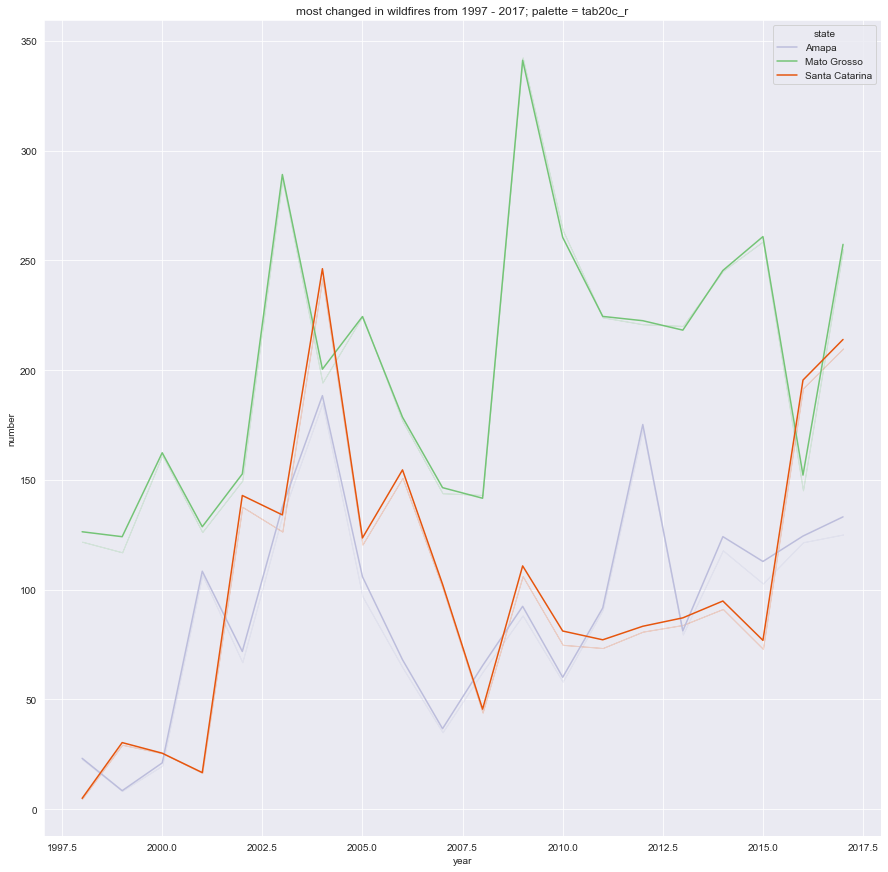

In [65]:
temp = data[(data['state'] == most3_states[0]) | (data['state'] == most3_states[1] )| \
            (data['state'] == most3_states[2] )]

plt.figure(figsize=(15,15))
sns.lineplot(data=temp,x='year',y='number',hue='state',ci=False,palette=random_palette())
plt.title(f'most changed in wildfires from 1997 - 2017; palette = {p}')
plt.show()

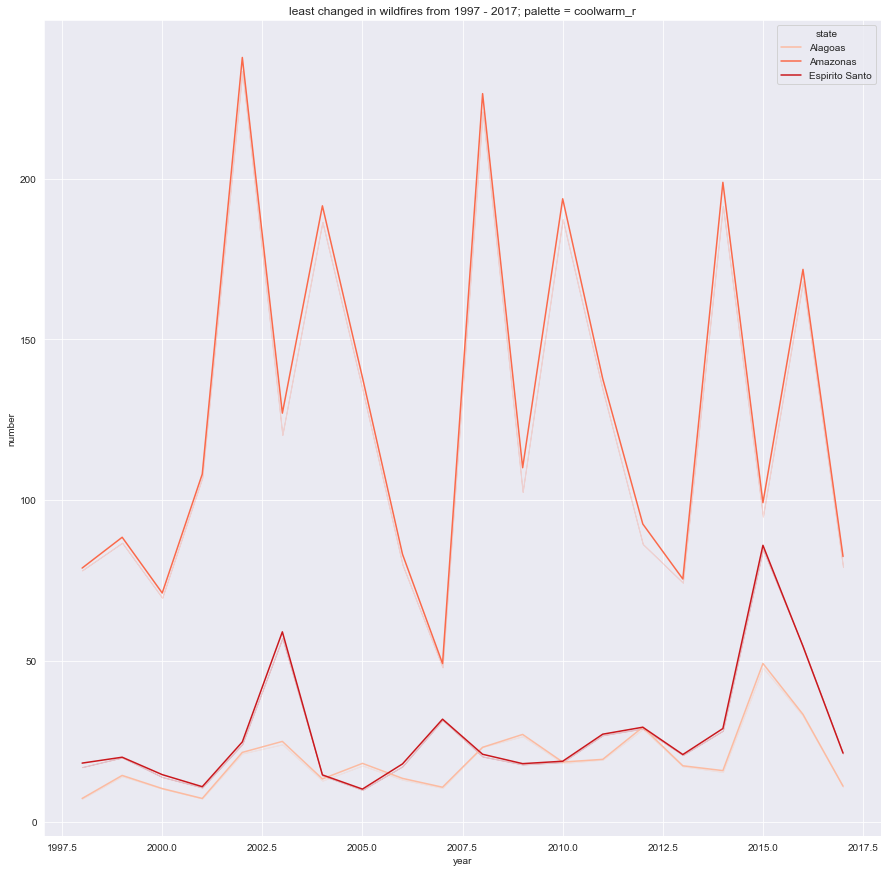

In [135]:
temp = data[(data['state'] == least3_states[0]) | (data['state'] == least3_states[1] )| \
            (data['state'] == least3_states[2] )]

plt.figure(figsize=(15,15))
sns.lineplot(data=temp,x='year',y='number',hue='state',ci=False,palette=random_palette())
plt.title(f'least changed in wildfires from 1997 - 2017; palette = {p}')
plt.show()

In [67]:
## which states have the most change in general

In [68]:
diffs2 = {}
for state in states:
    temp = data[data['state'] == state]
    temp = temp.groupby('year')['number'].mean()
    miny = temp.min()
    maxy = temp.max()
    diffs2[state] = {'change': abs(miny - maxy),'min': miny, 'max': maxy}

In [176]:
print('*'*20,'state change ','*'*20)

for key,val in sorted(diffs2.items(), key=lambda items: items[1]['change']):
    print(f'{key}: {val}')

******************** state change  ********************
Sergipe: {'change': 32.16666666666667, 'min': 1.4166666666666667, 'max': 33.583333333333336}
Distrito Federal: {'change': 38.25, 'min': 3.8333333333333335, 'max': 42.083333333333336}
Alagoas: {'change': 42.0, 'min': 7.166666666666667, 'max': 49.166666666666664}
Espirito Santo: {'change': 75.83333333333334, 'min': 10.083333333333334, 'max': 85.91666666666667}
Paraiba: {'change': 100.26096491228071, 'min': 42.94736842105263, 'max': 143.20833333333334}
Acre: {'change': 100.91241666666667, 'min': 27.75, 'max': 128.66241666666667}
Rio: {'change': 114.53819444444444, 'min': 18.055555555555557, 'max': 132.59375}
Maranhao: {'change': 128.77691666666666, 'min': 30.490333333333336, 'max': 159.26725}
Parï¿½: {'change': 144.10416666666663, 'min': 41.73041666666667, 'max': 185.8345833333333}
Rondonia: {'change': 149.81708333333333, 'min': 17.410166666666665, 'max': 167.22725}
Minas Gerais: {'change': 156.82916666666665, 'min': 83.10325, 'max':

In [70]:
most3_states2 = ['Sao Paulo', 'Santa Catarina','Mato Grosso']
least3_states2 = ['Sergipe','Distrito Federal','Alagoas']

In [207]:
list(top5_states_df.index)

['Sao Paulo', 'Mato Grosso', 'Bahia', 'Piau', 'Goias']

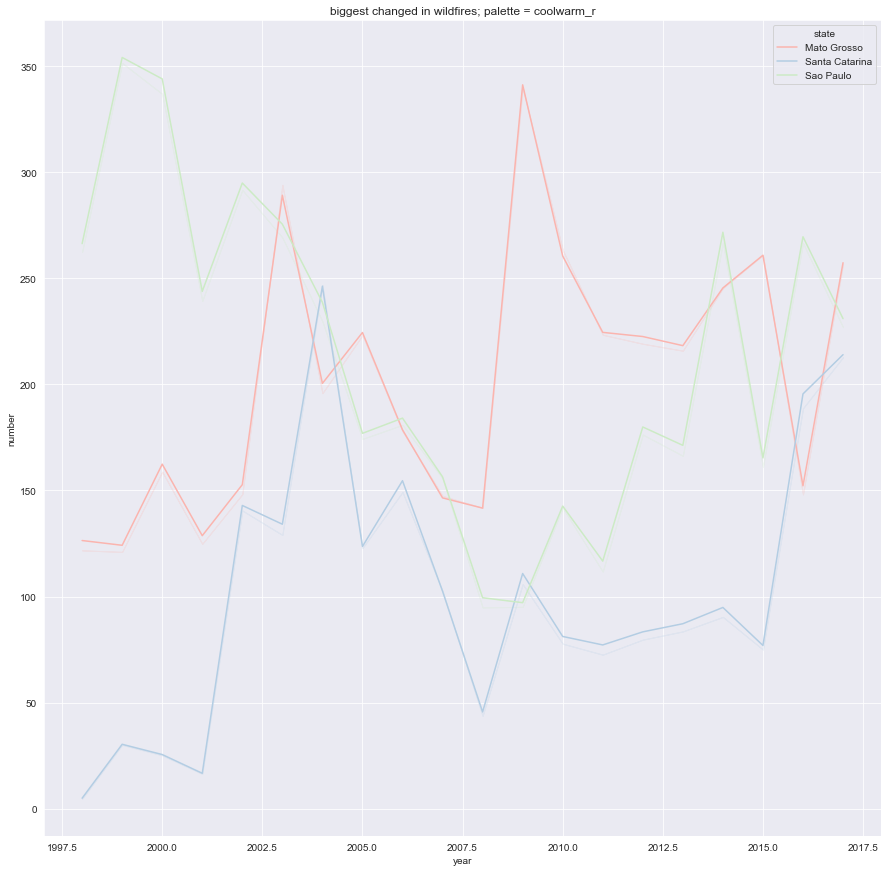

In [136]:
temp = data[(data['state'] == most3_states2[0]) | (data['state'] == most3_states2[1] )| \
            (data['state'] == most3_states2[2] )]

plt.figure(figsize=(15,15))
sns.lineplot(data=temp,x='year',y='number',hue='state',ci=False,palette=random_palette())
plt.title(f'biggest changed in wildfires; palette = {p}')
plt.show()

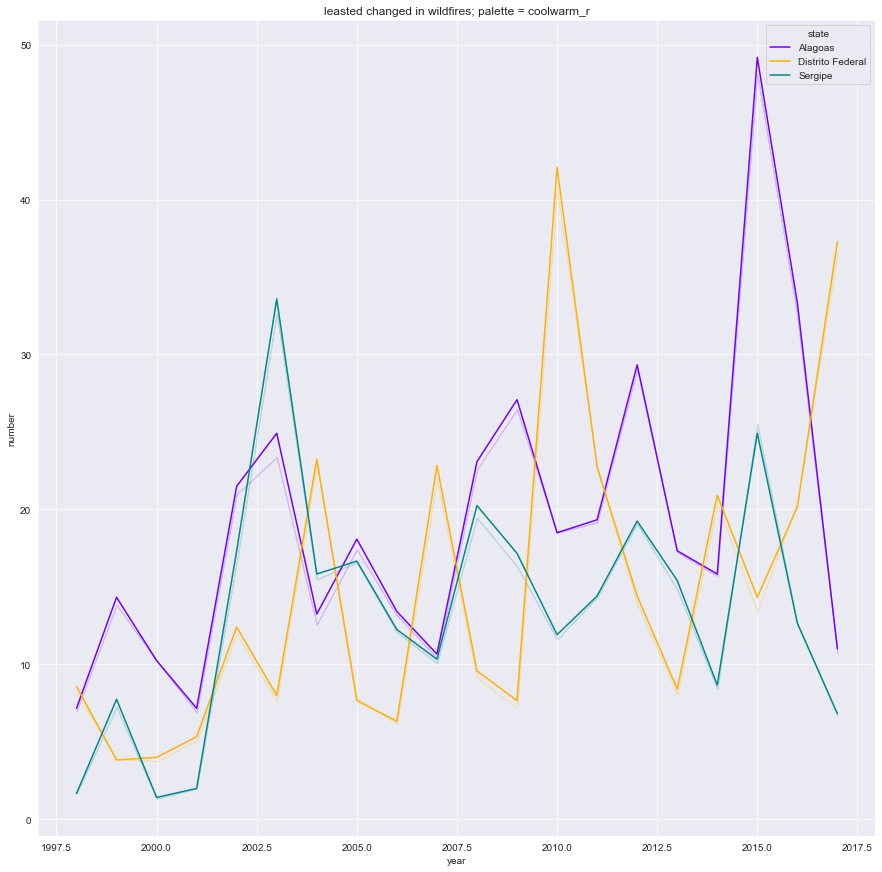

In [137]:
temp = data[(data['state'] == least3_states2[0]) | (data['state'] == least3_states2[1] )| \
            (data['state'] == least3_states2[2] )]

plt.figure(figsize=(15,15))
sns.lineplot(data=temp,x='year',y='number',hue='state',ci=False,palette=random_palette())
plt.title(f'leasted changed in wildfires; palette = {p}')
plt.show()

### Lets get the percent of states vs all fires

In [73]:
total_fire_count = data['number'].sum()
total_fire_count

698811.073

In [175]:
print('*'*20,'state percentage for fires','*'*20)

df_per_num = data.groupby('state')['number'].sum() / total_fire_count * 100
df_per_num

******************** state percentage for fires ********************


state
Acre                 2.642206
Alagoas              0.659119
Amapa                3.124103
Amazonas             4.386039
Bahia                6.403194
Ceara                4.354262
Distrito Federal     0.509580
Espirito Santo       0.936734
Goias                5.394236
Maranhao             3.595984
Mato Grosso         13.772825
Minas Gerais         5.362717
Paraiba              7.502302
Parï¿½               3.507693
Pernambuco           3.505669
Piau                 5.409724
Rio                  6.453084
Rondonia             2.902849
Roraima              3.489509
Santa Catarina       3.485900
Sao Paulo            7.315453
Sergipe              0.463215
Tocantins            4.823605
Name: number, dtype: float64

<AxesSubplot:ylabel='state'>

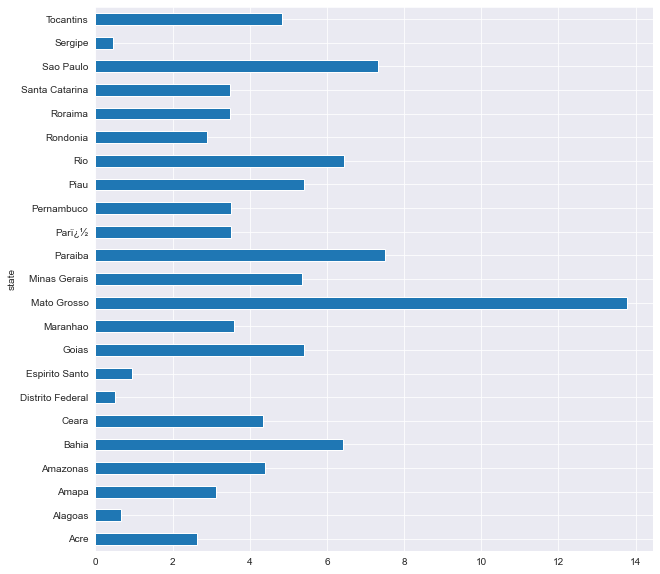

In [75]:
df_per_num.plot(kind='barh',figsize=(10,10))

In [78]:
target = 'Mato Grosso'

In [79]:
#df_per_num.plot(kind='pie',figsize=(10,10))


In [80]:
explode = [0 if states[x] != target else 0.1 for x in range(len(states)) ]
explode

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

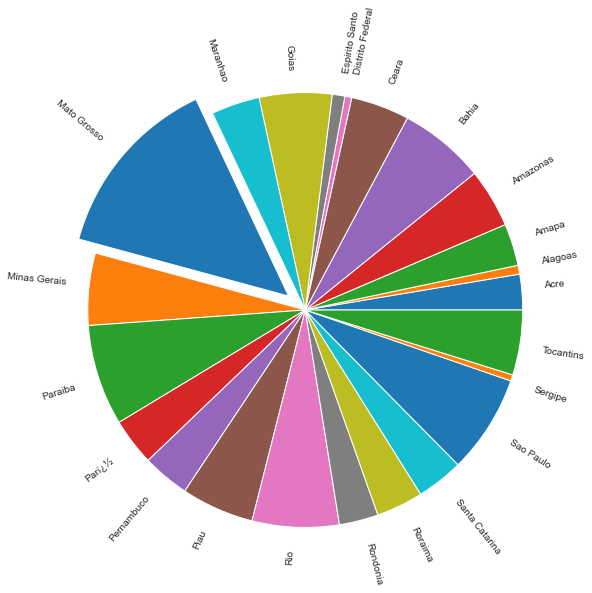

In [81]:
plt.figure(figsize=(15,10))
plt.pie(df_per_num, labels=df_per_num.index, explode=explode, rotatelabels=4)
plt.show()

In [82]:
df_mato = data[data['state'] == target]
df_mato.sample(5)

year        state    month   number       date  day_of_week
2638  2006  Mato Grosso  January   59.000 2006-01-01            6
2772  2000  Mato Grosso   August  530.000 2000-01-01            5
2461  2008  Mato Grosso    April  274.000 2008-01-01            1
2398  2005  Mato Grosso  January  438.000 2005-01-01            5
2587  2014  Mato Grosso  October    5.281 2014-01-01            2

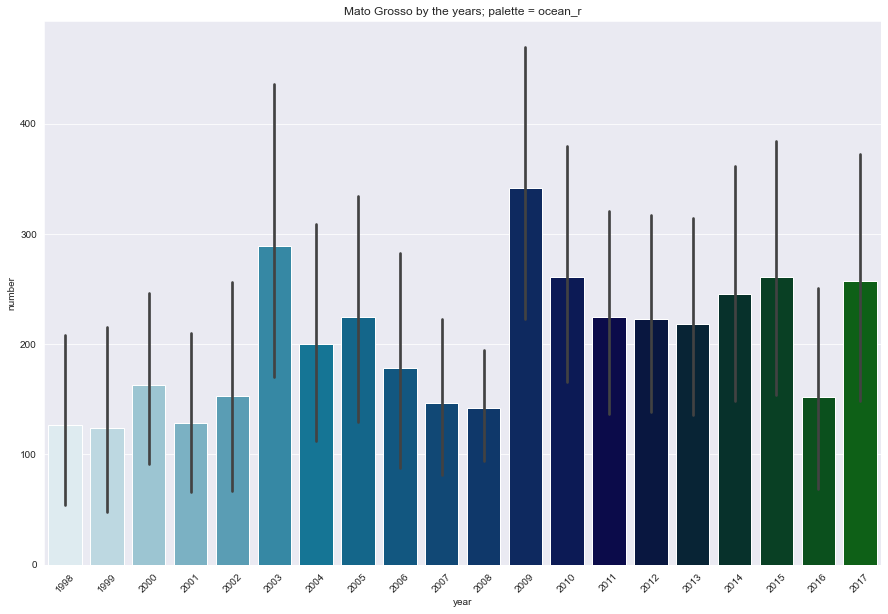

In [83]:
plt.figure(figsize=(15,10))
p = random.choice(palettes)
sns.barplot(data=df_mato,x='year',y='number',palette=p)
plt.title(f'Mato Grosso by the years; palette = {p}')
plt.xticks(rotation=45)
plt.show()


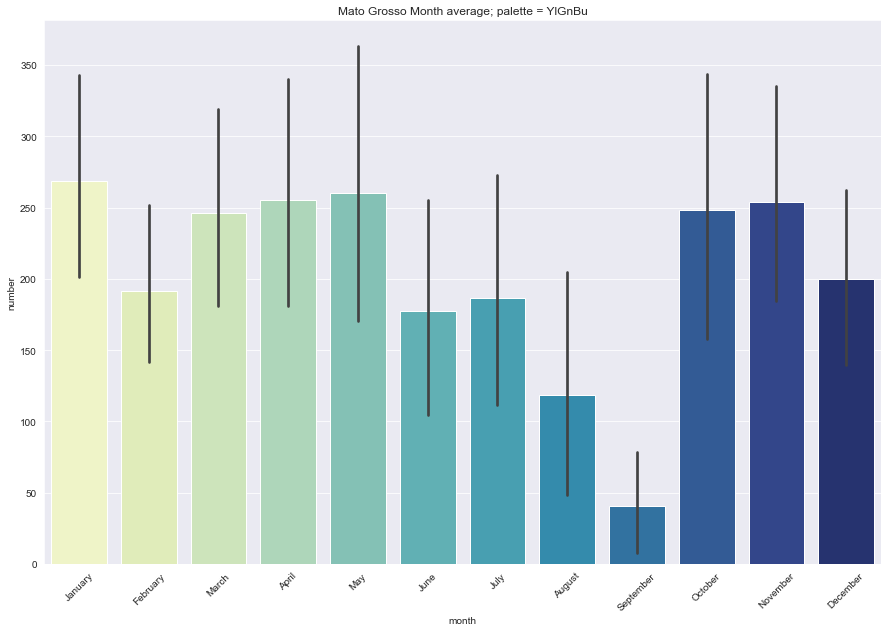

In [84]:
plt.figure(figsize=(15,10))
p = random.choice(palettes)
sns.barplot(data=df_mato,x='month',y='number',palette=p)
plt.title(f'Mato Grosso Month average; palette = {p}')
plt.xticks(rotation=45)
plt.show()


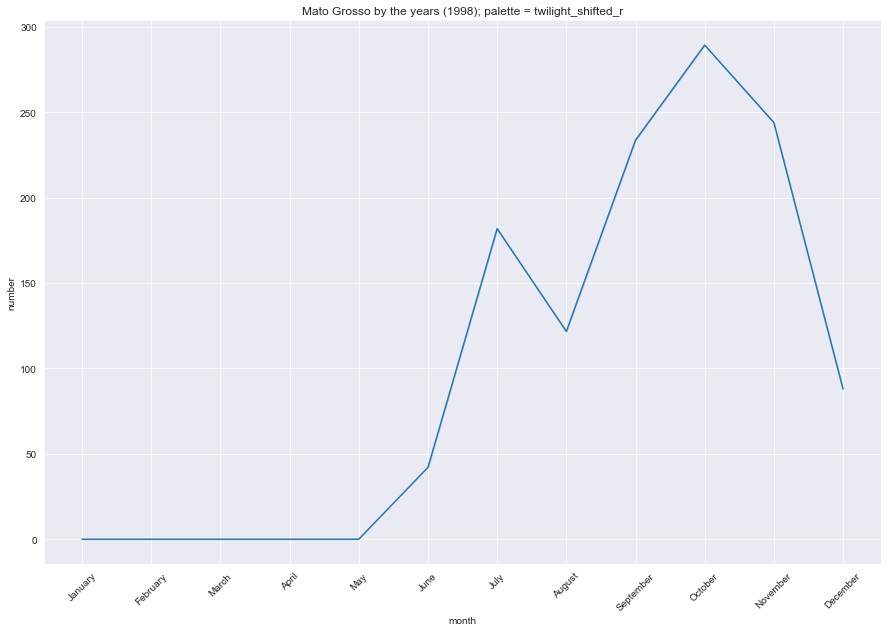

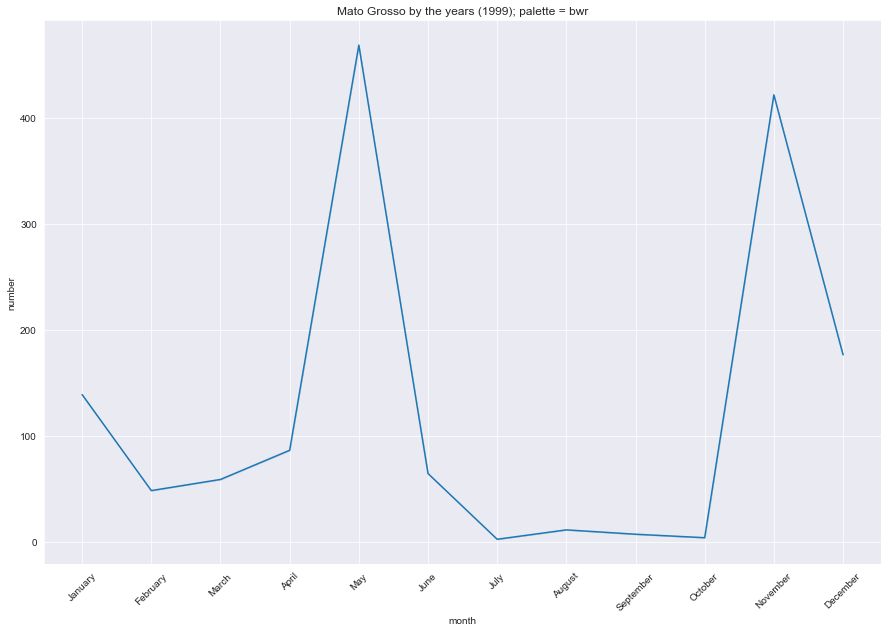

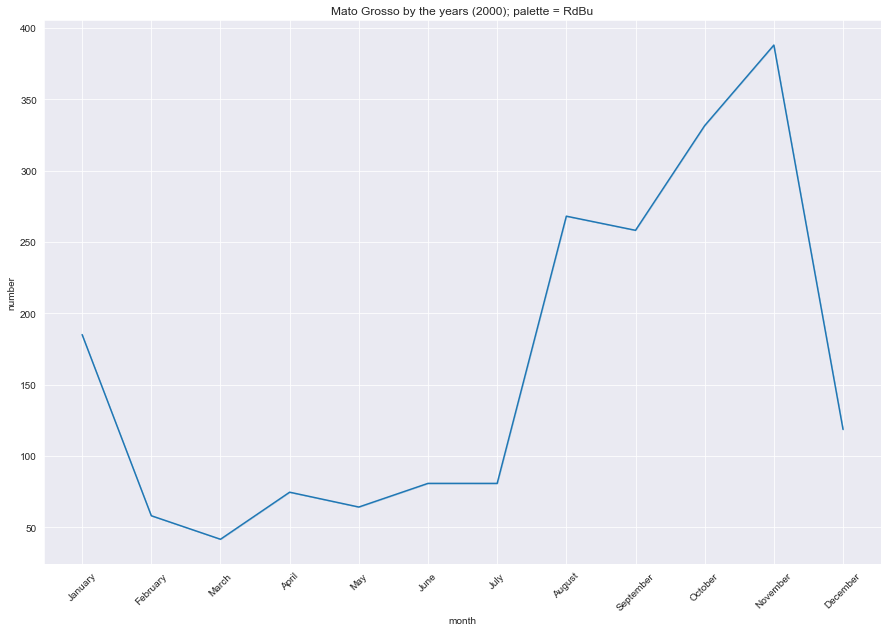

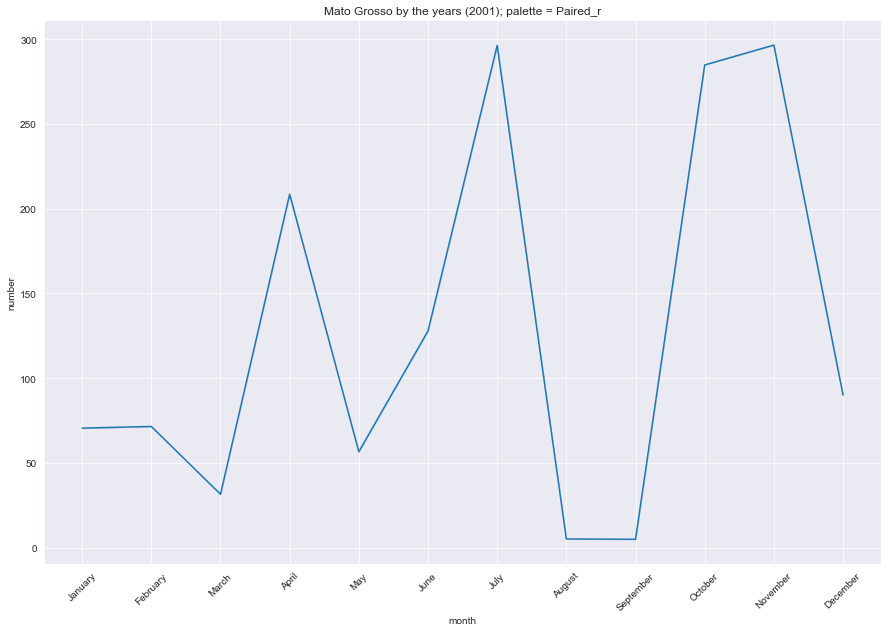

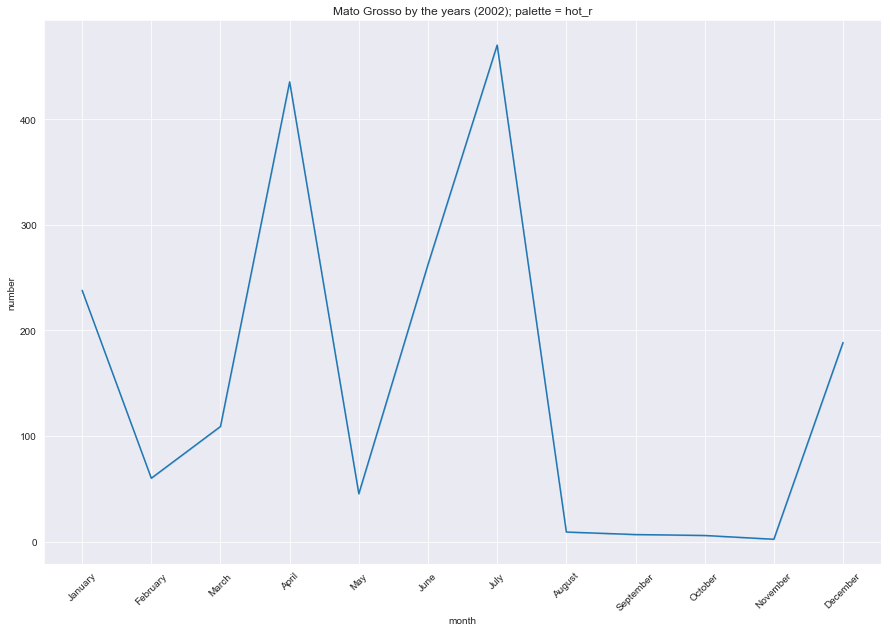

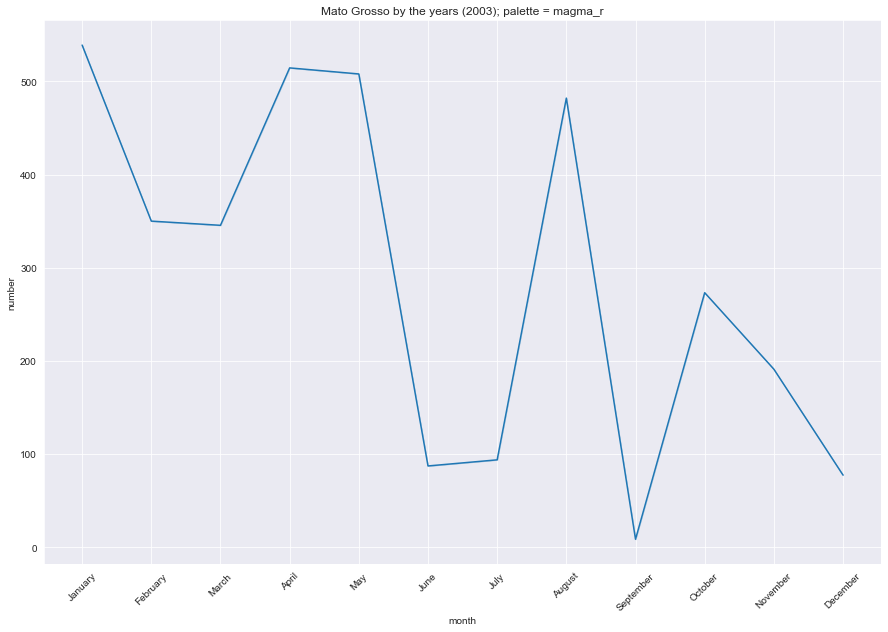

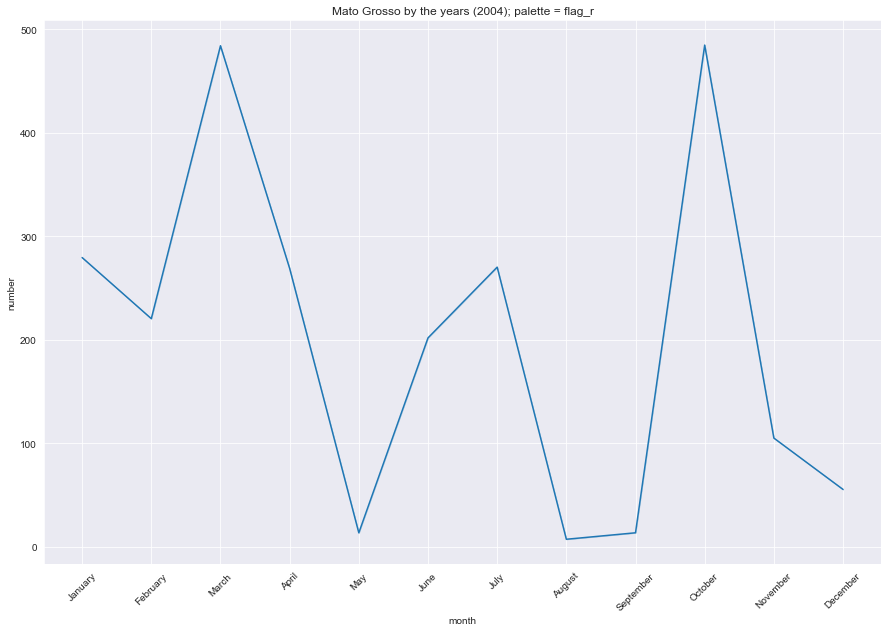

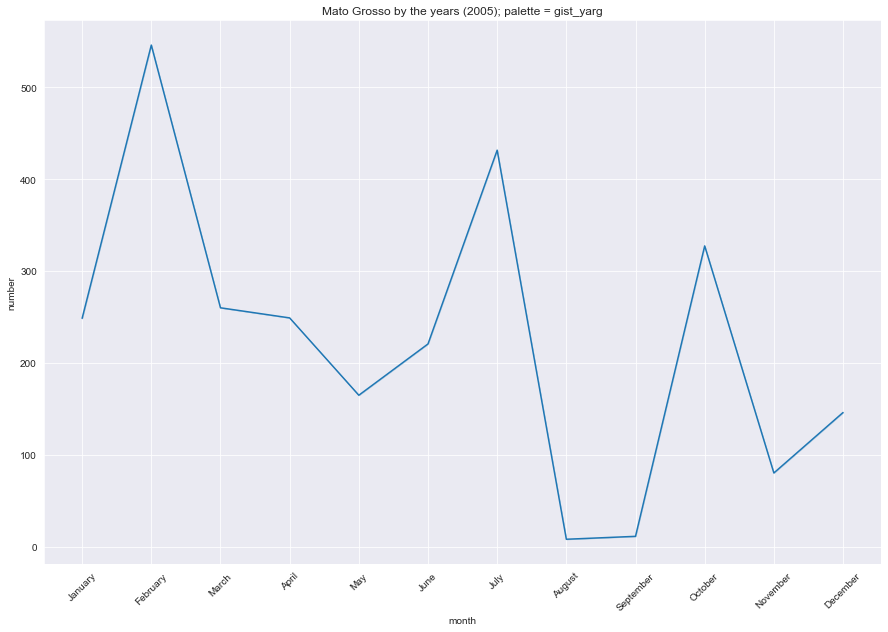

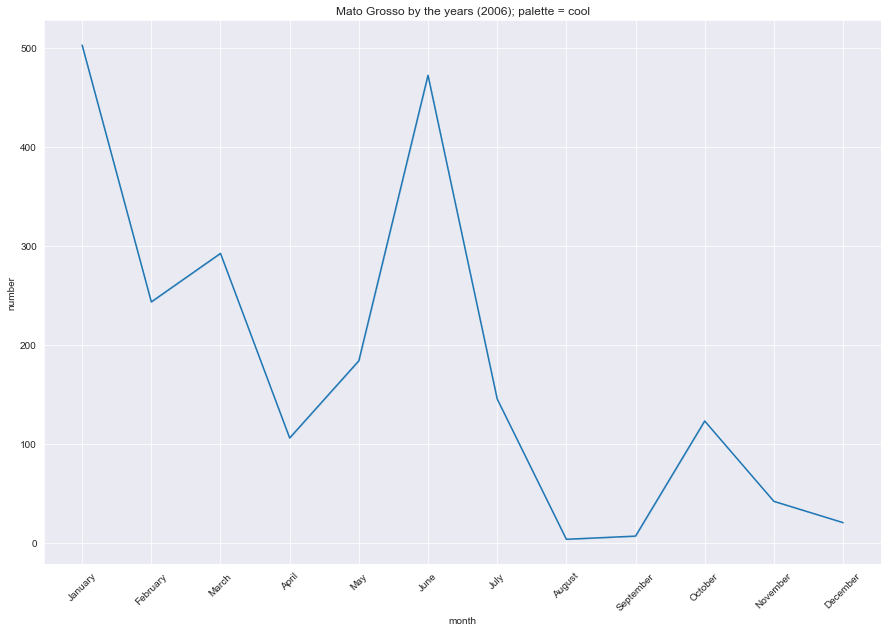

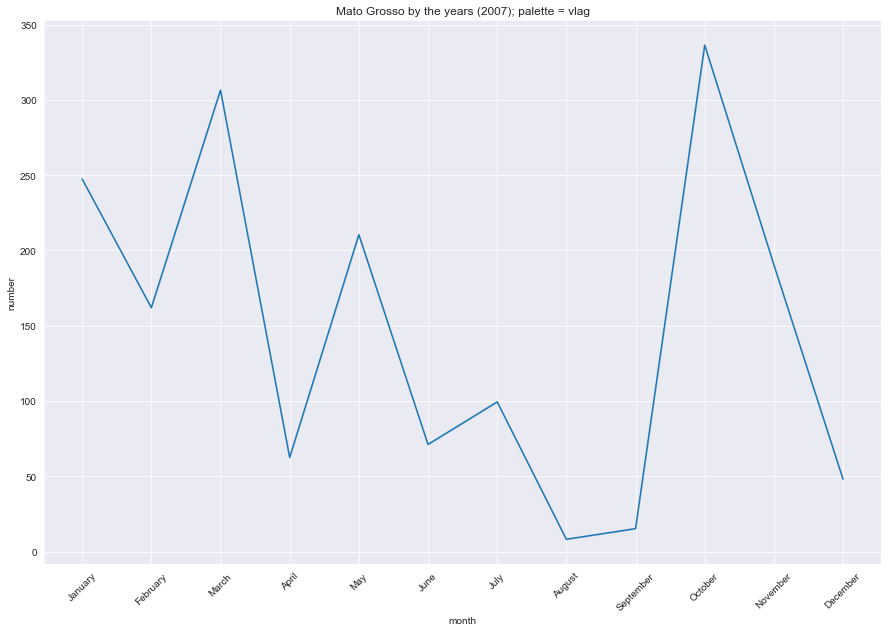

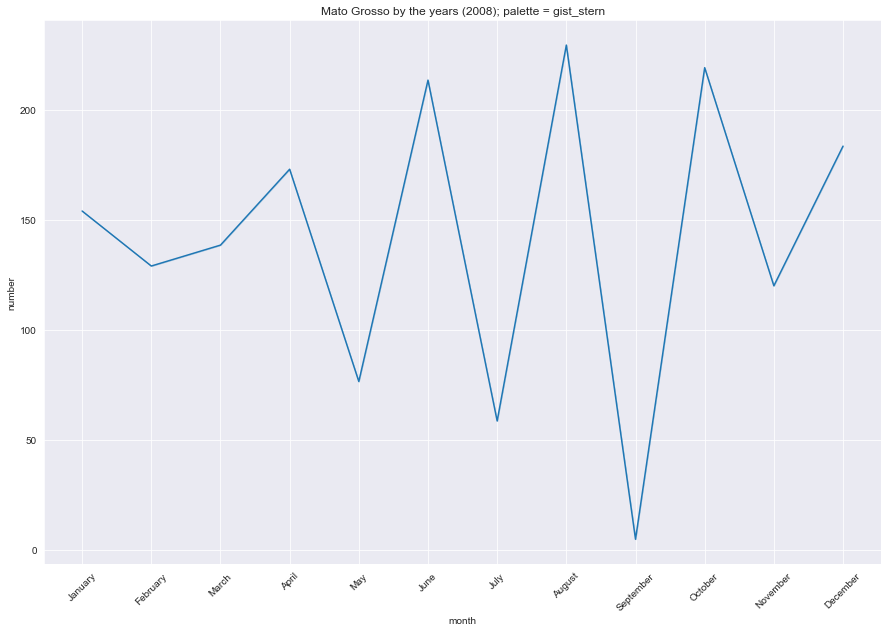

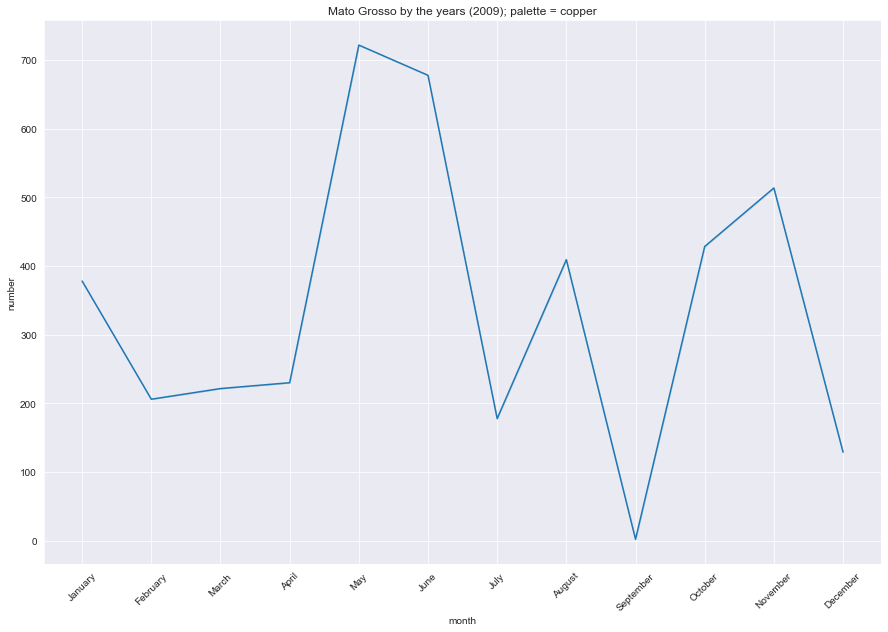

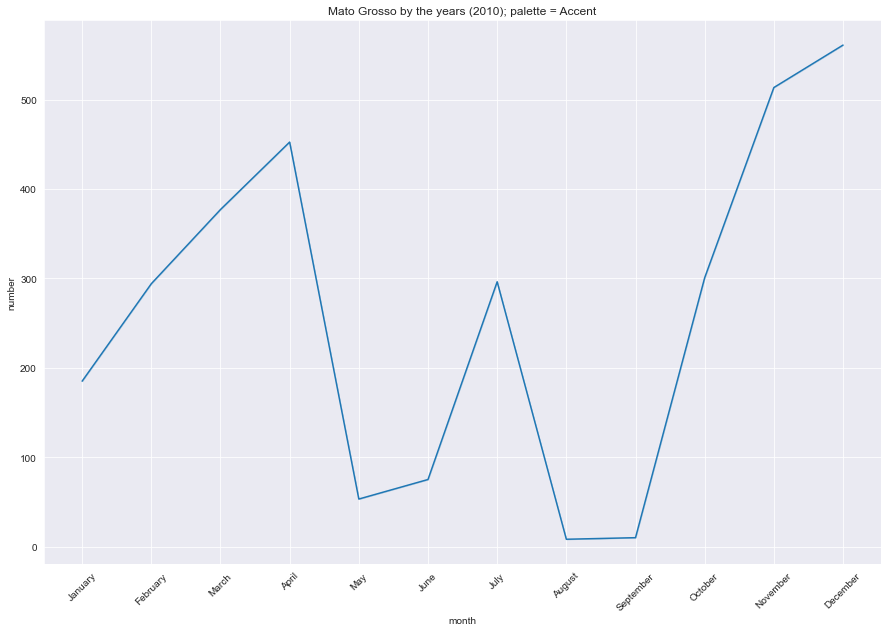

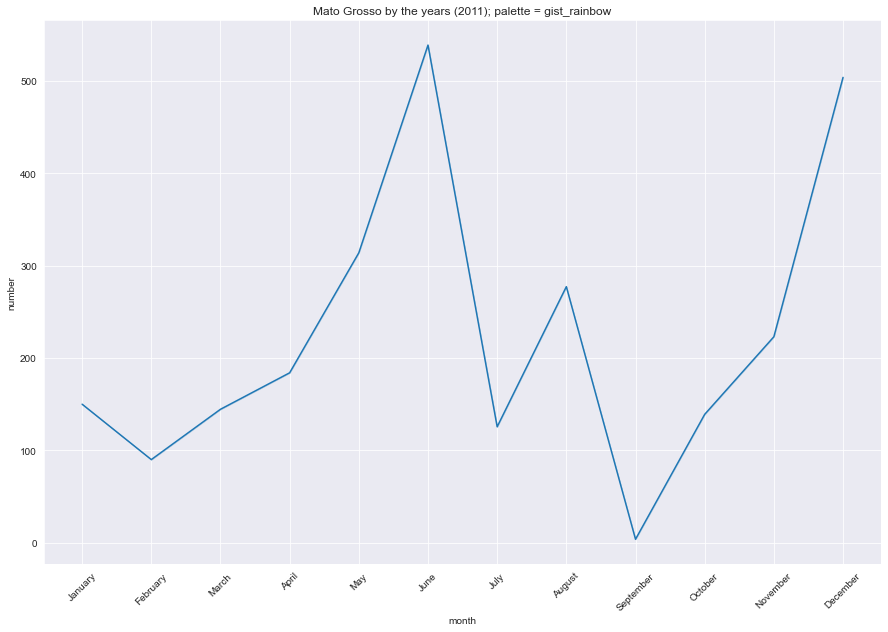

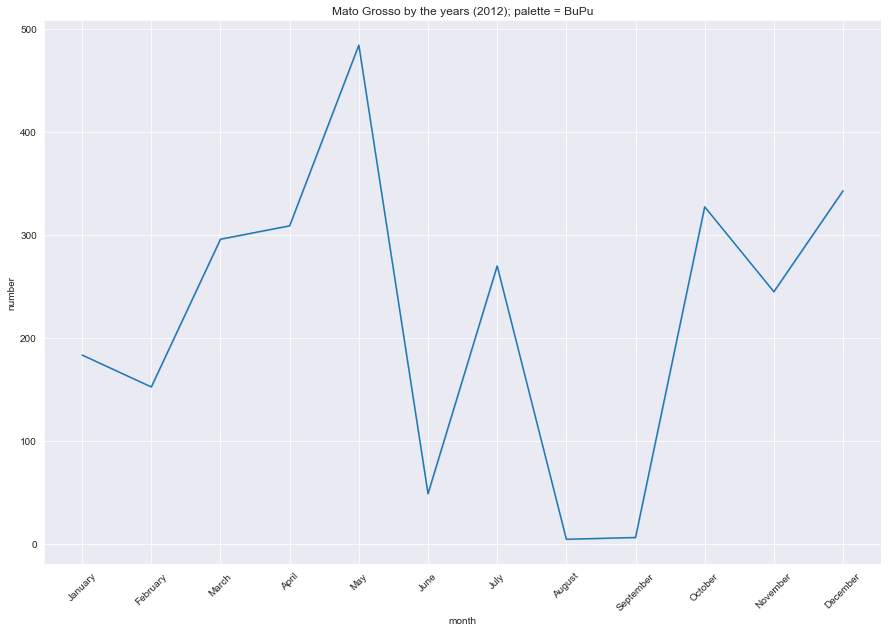

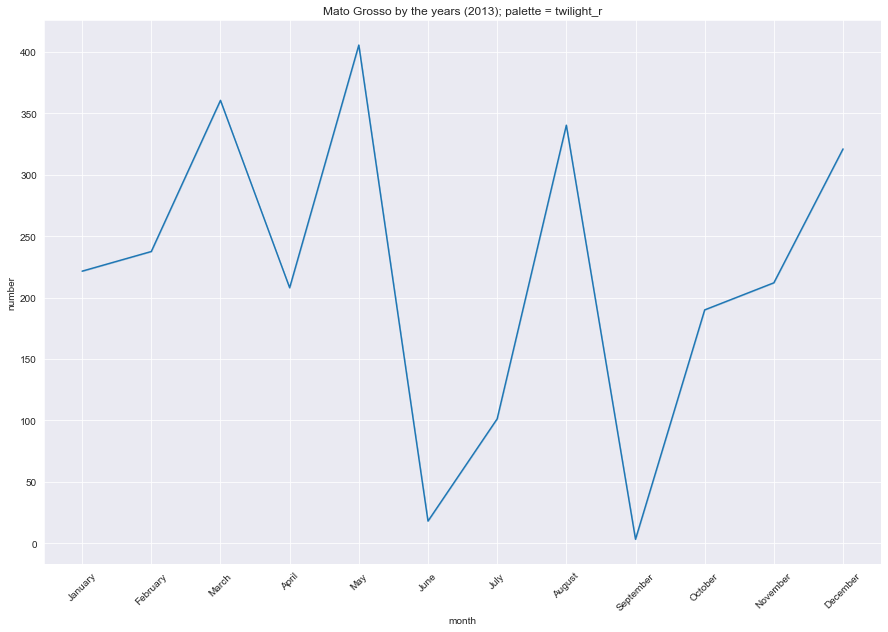

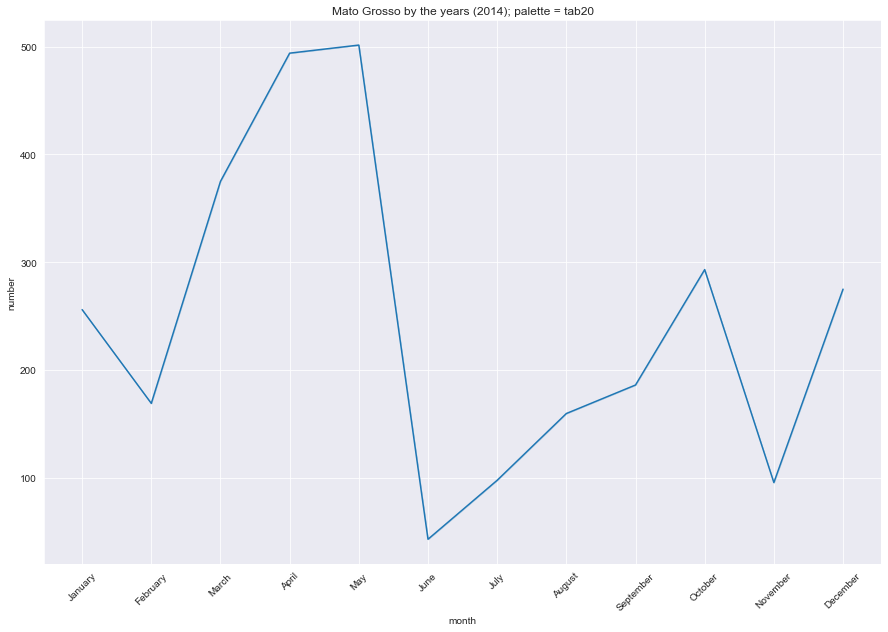

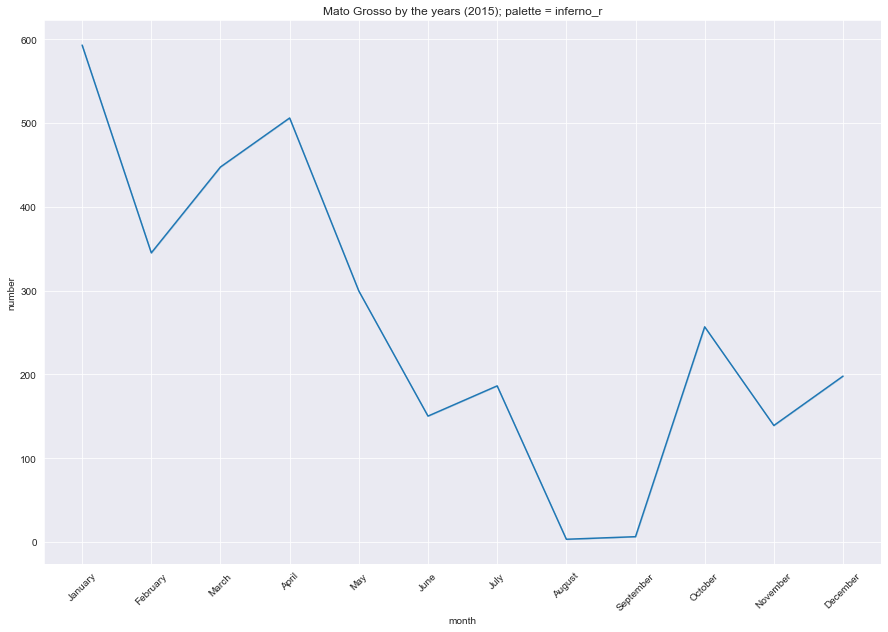

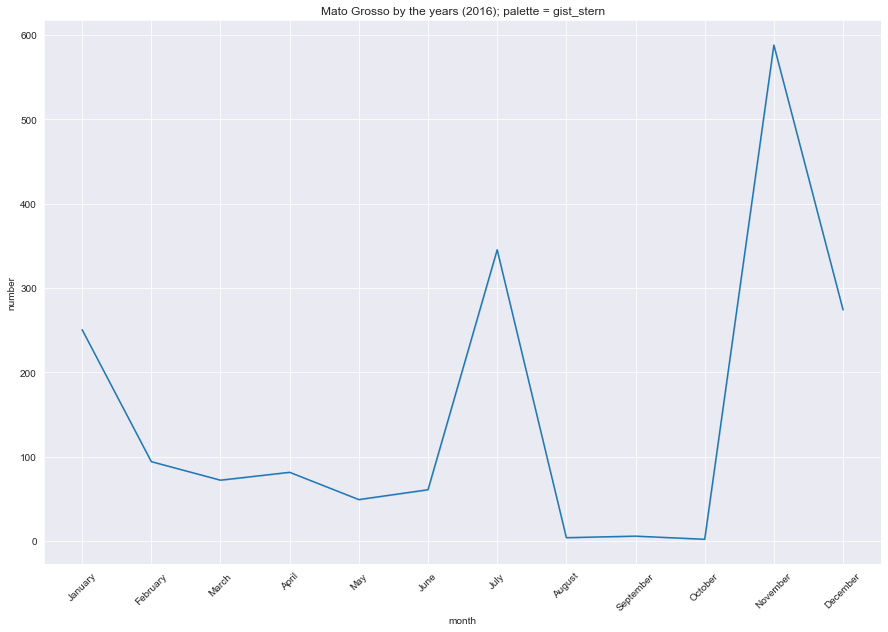

In [85]:
for year in range(early_year,recent_year):
    temp = df_mato[df_mato['year'] == year]
    plt.figure(figsize=(15,10))
    p = random.choice(palettes)
    sns.lineplot(data=temp,x='month',y='number',palette=p,ci=False)
    plt.title(f'Mato Grosso by the years ({year}); palette = {p}')
    plt.xticks(rotation=45)
    plt.show()


In [86]:
gdata_month_per = data.groupby('month')['number'].sum() / total_fire_count * 100

In [174]:
print('*'*20,'month percentage for fires','*'*20)

gdata_month_per

******************** month percentage for fires ********************


month
April         4.033246
August       12.600034
December      8.233338
February      4.413074
January       6.823281
July         13.210883
June          8.013278
March         4.394522
May           4.969206
November     12.236219
October      12.690351
September     8.382567
Name: number, dtype: float64

<AxesSubplot:ylabel='month'>

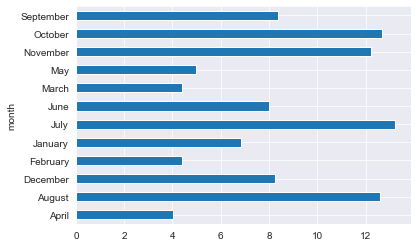

In [88]:
gdata_month_per.plot(kind='barh')

In [173]:
print('*'*20,'year percentage for fires','*'*20)

gdata_year_per = data.groupby('year')['number'].sum() / total_fire_count * 100
gdata_year_per

******************** year percentage for fires ********************


year
1998    2.864003
1999    3.846937
2000    3.913969
2001    4.157721
2002    5.350602
2003    6.119061
2004    5.502226
2005    5.009217
2006    4.840244
2007    4.726372
2008    4.204135
2009    5.597533
2010    5.300066
2011    4.956067
2012    5.736151
2013    5.028128
2014    5.669799
2015    5.896915
2016    6.040578
2017    5.240275
Name: number, dtype: float64

<AxesSubplot:ylabel='year'>

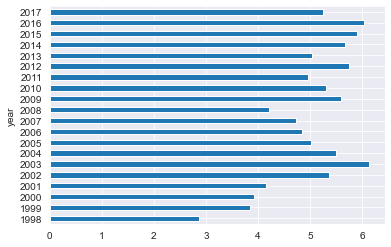

In [90]:
gdata_year_per.plot(kind='barh')

In [94]:
months = data['month'].unique()
months_dict = {}
for i in range(len(months)):
    months_dict[months[i]] = i

    

In [95]:
def convert_month(month):
    if month in months_dict:
        return months_dict[month]
    return months_dict

In [97]:
data['month_num'] = data['month'].apply(convert_month)

In [99]:
data.corr()['number']

year           0.062600
number         1.000000
day_of_week    0.010932
month_num      0.161706
Name: number, dtype: float64

In [165]:
month_state_dict = {}
for state in states:
    temp = data[data['state'] == state]
    month_state_dict[state] = temp.corr()['number'].loc['month_num']

In [171]:
print('*'*20,'state to month corr','*'*20)
for k,v in sorted(month_state_dict.items(), key=lambda items: items[1], reverse=True):
    print(f'{k} : {round(v,3)}')

******************** state to month corr ********************
Amapa : 0.556
Pernambuco : 0.533
Ceara : 0.405
Paraiba : 0.363
Piau : 0.362
Amazonas : 0.354
Santa Catarina : 0.301
Acre : 0.283
Rondonia : 0.281
Sao Paulo : 0.281
Espirito Santo : 0.269
Rio : 0.256
Distrito Federal : 0.232
Goias : 0.173
Minas Gerais : 0.15
Tocantins : 0.07
Alagoas : 0.037
Bahia : 0.016
Mato Grosso : -0.08
Parï¿½ : -0.138
Maranhao : -0.181
Sergipe : -0.284
Roraima : -0.31


In [120]:
month_state_dict[target]

-0.0802438796210291

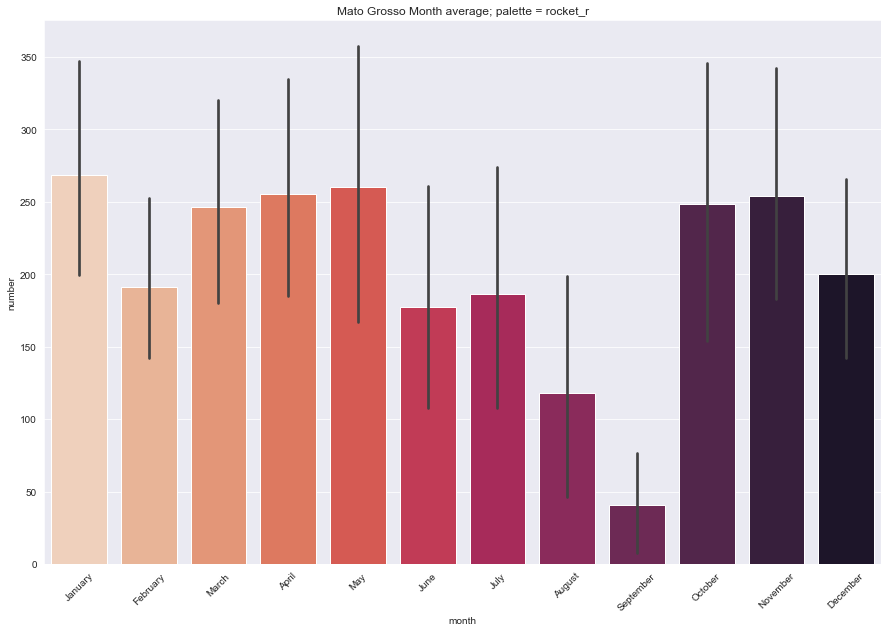

In [121]:
plt.figure(figsize=(15,10))
p = random.choice(palettes)
sns.barplot(data=df_mato,x='month',y='number',palette=p)
plt.title(f'Mato Grosso Month average; palette = {p}')
plt.xticks(rotation=45)
plt.show()

In [123]:
df_Amapa = data[data['state'] == 'Amapa']


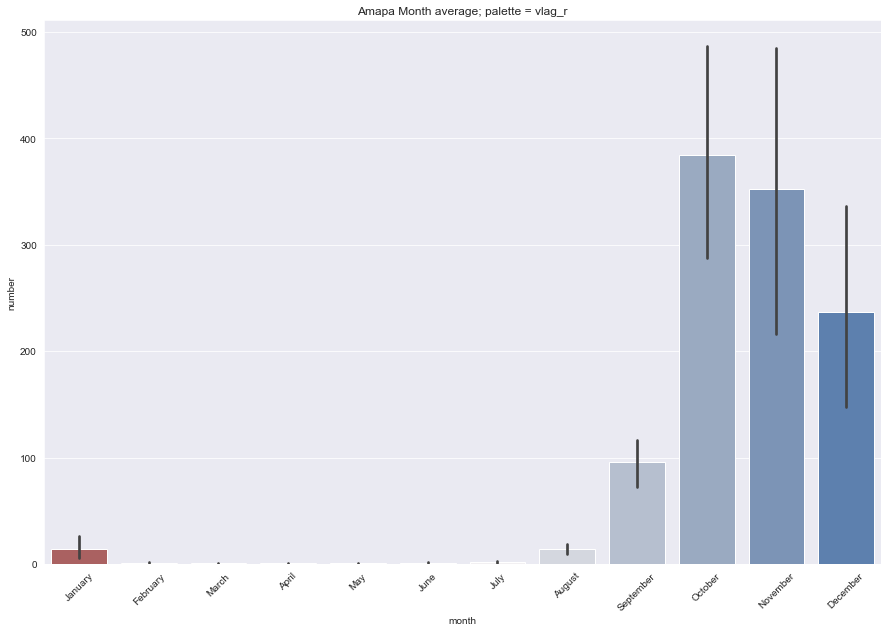

In [161]:

plt.figure(figsize=(15,10))
p = random.choice(palettes)
sns.barplot(data=df_Amapa,x='month',y='number',palette=p)
plt.title(f'Amapa Month average; palette = {p}')
plt.xticks(rotation=45)
plt.show()